In [1]:
import warnings
warnings.filterwarnings('ignore')

# Defining Data Directory Path

In [86]:
import os
from pathlib import Path

In [87]:
DATA_DIRECTORY = Path('Data')
TRAIN_CSV = os.path.join(DATA_DIRECTORY,"train.csv")
TEST_CSV = os.path.join(DATA_DIRECTORY,"test.csv")

# Loading the Data

In [88]:
import pandas as pd

In [89]:
train_df = pd.read_csv(TRAIN_CSV)
train_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

# Data Information

In [90]:
train_df.shape

(45211, 17)

In [91]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [92]:
train_df.isnull().mean()*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

#### `No Missing values found in the data`

In [93]:
train_df["day"] = train_df["day"].astype("object")

In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(6), object(11)
memory usage: 5.9+ MB


#### `Numerical Features --> 6`
#### `Categorical Features --> 11`

# Spliting Numerical and Categorical Data

In [95]:
numerical_df = train_df.select_dtypes(exclude='object')
numerical_df.head()

age  balance  duration  campaign  pdays  previous
0   58     2143       261         1     -1         0
1   44       29       151         1     -1         0
2   33        2        76         1     -1         0
3   47     1506        92         1     -1         0
4   33        1       198         1     -1         0

In [96]:
categorical_df = train_df.select_dtypes(include='object')
categorical_df.head()

job  marital  education default housing loan  contact day month  \
0    management  married   tertiary      no     yes   no  unknown   5   may   
1    technician   single  secondary      no     yes   no  unknown   5   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   5   may   
3   blue-collar  married    unknown      no     yes   no  unknown   5   may   
4       unknown   single    unknown      no      no   no  unknown   5   may   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no

# Numerical Data Analysis

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Univariate Analysis

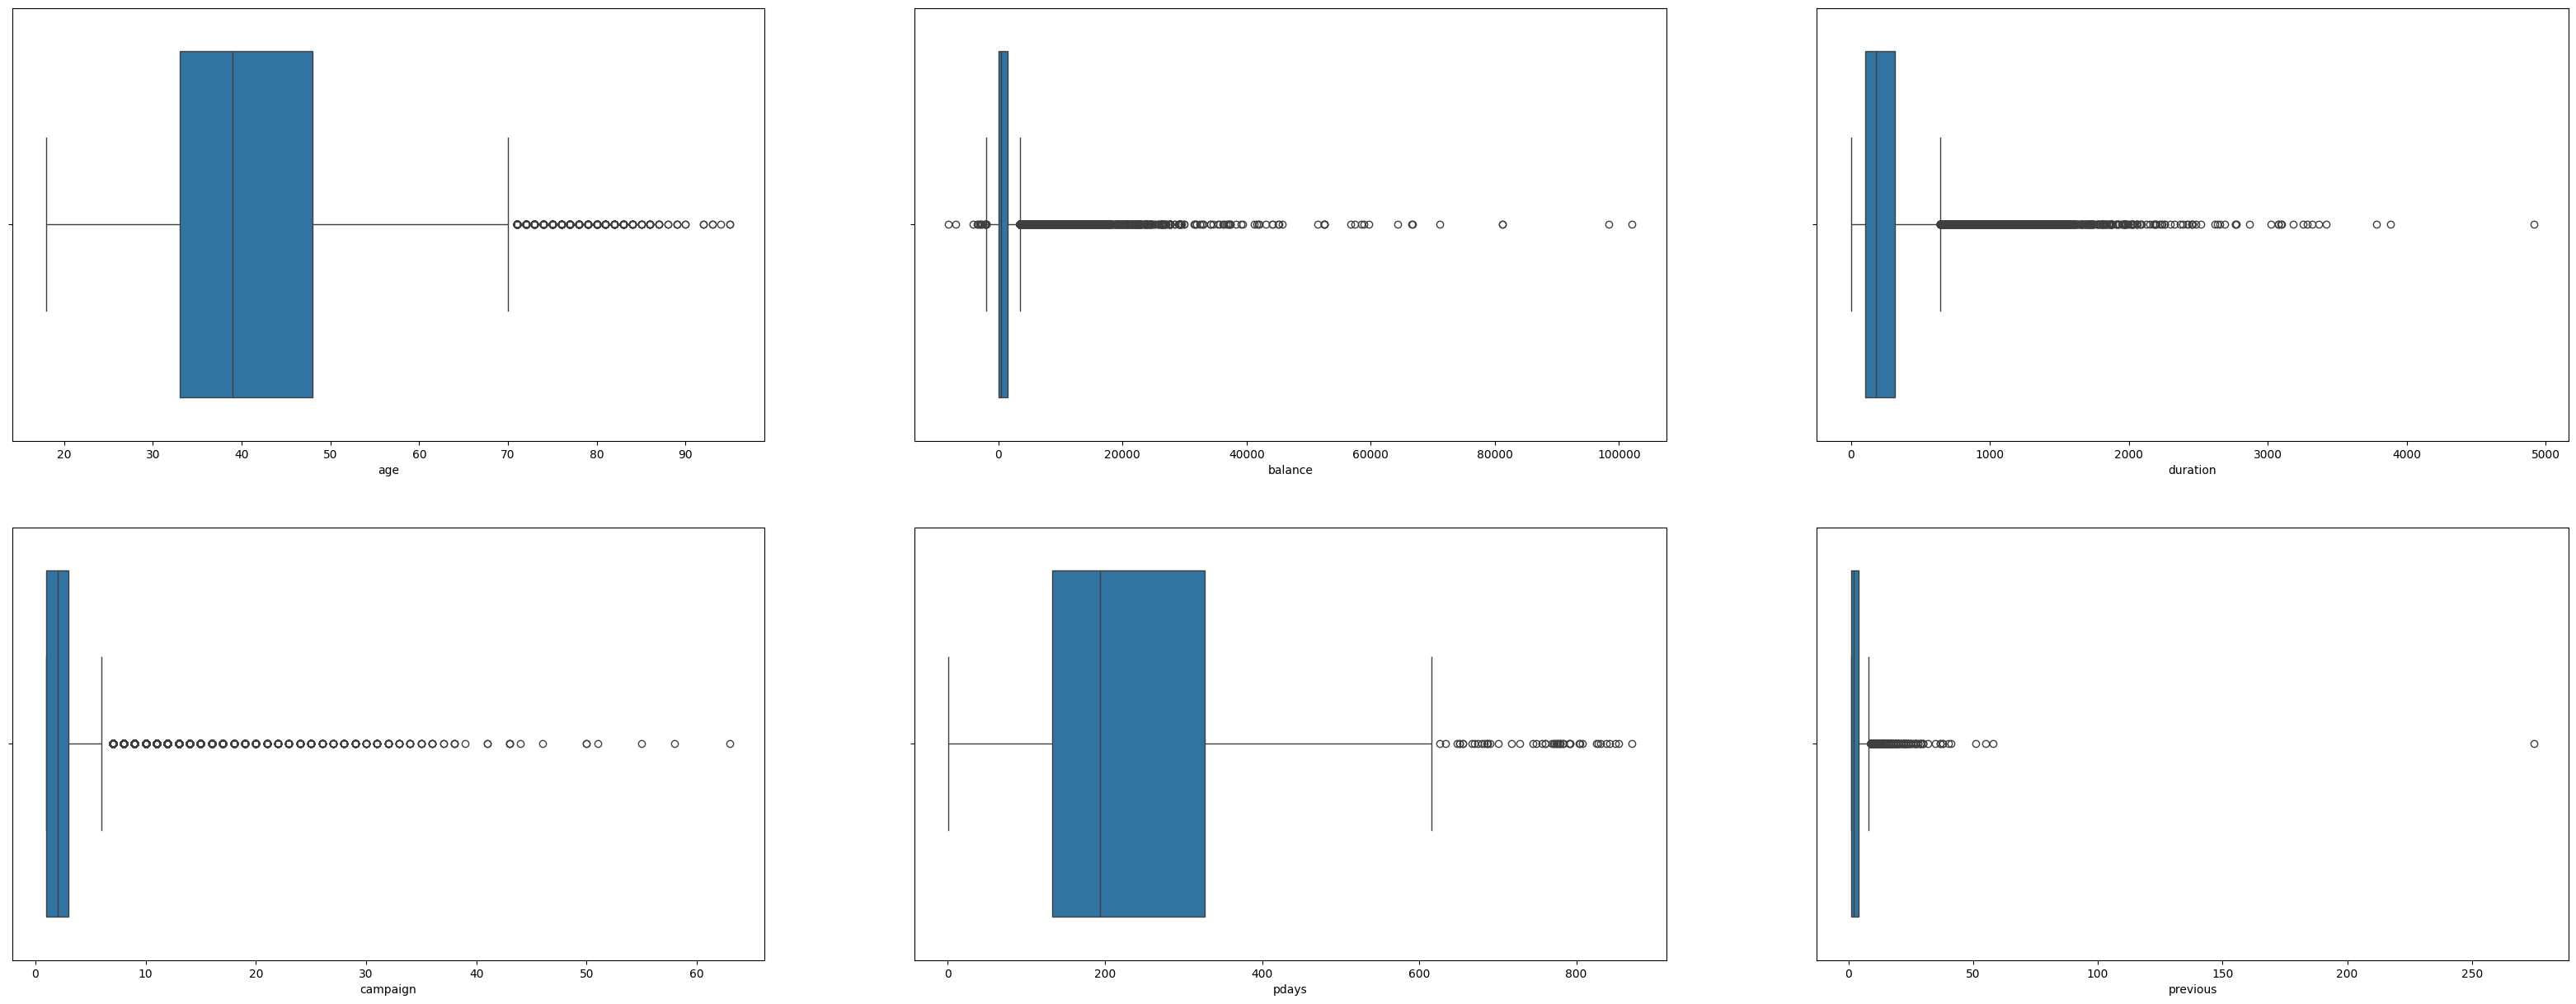

In [98]:
plt.figure(figsize=(40,15))

columns = numerical_df.columns

for idx,col in enumerate(columns):
    plt.subplot(2,3,idx+1) 

    if col =='pdays':
        data = train_df[train_df[col]>-1]
        sns.boxplot(data = data,x = col)
        continue  

    if col == 'previous':
        data = train_df[train_df[col]>0]
        sns.boxplot(data = data,x = col)
        continue    

    sns.boxplot(data = train_df,x = col)

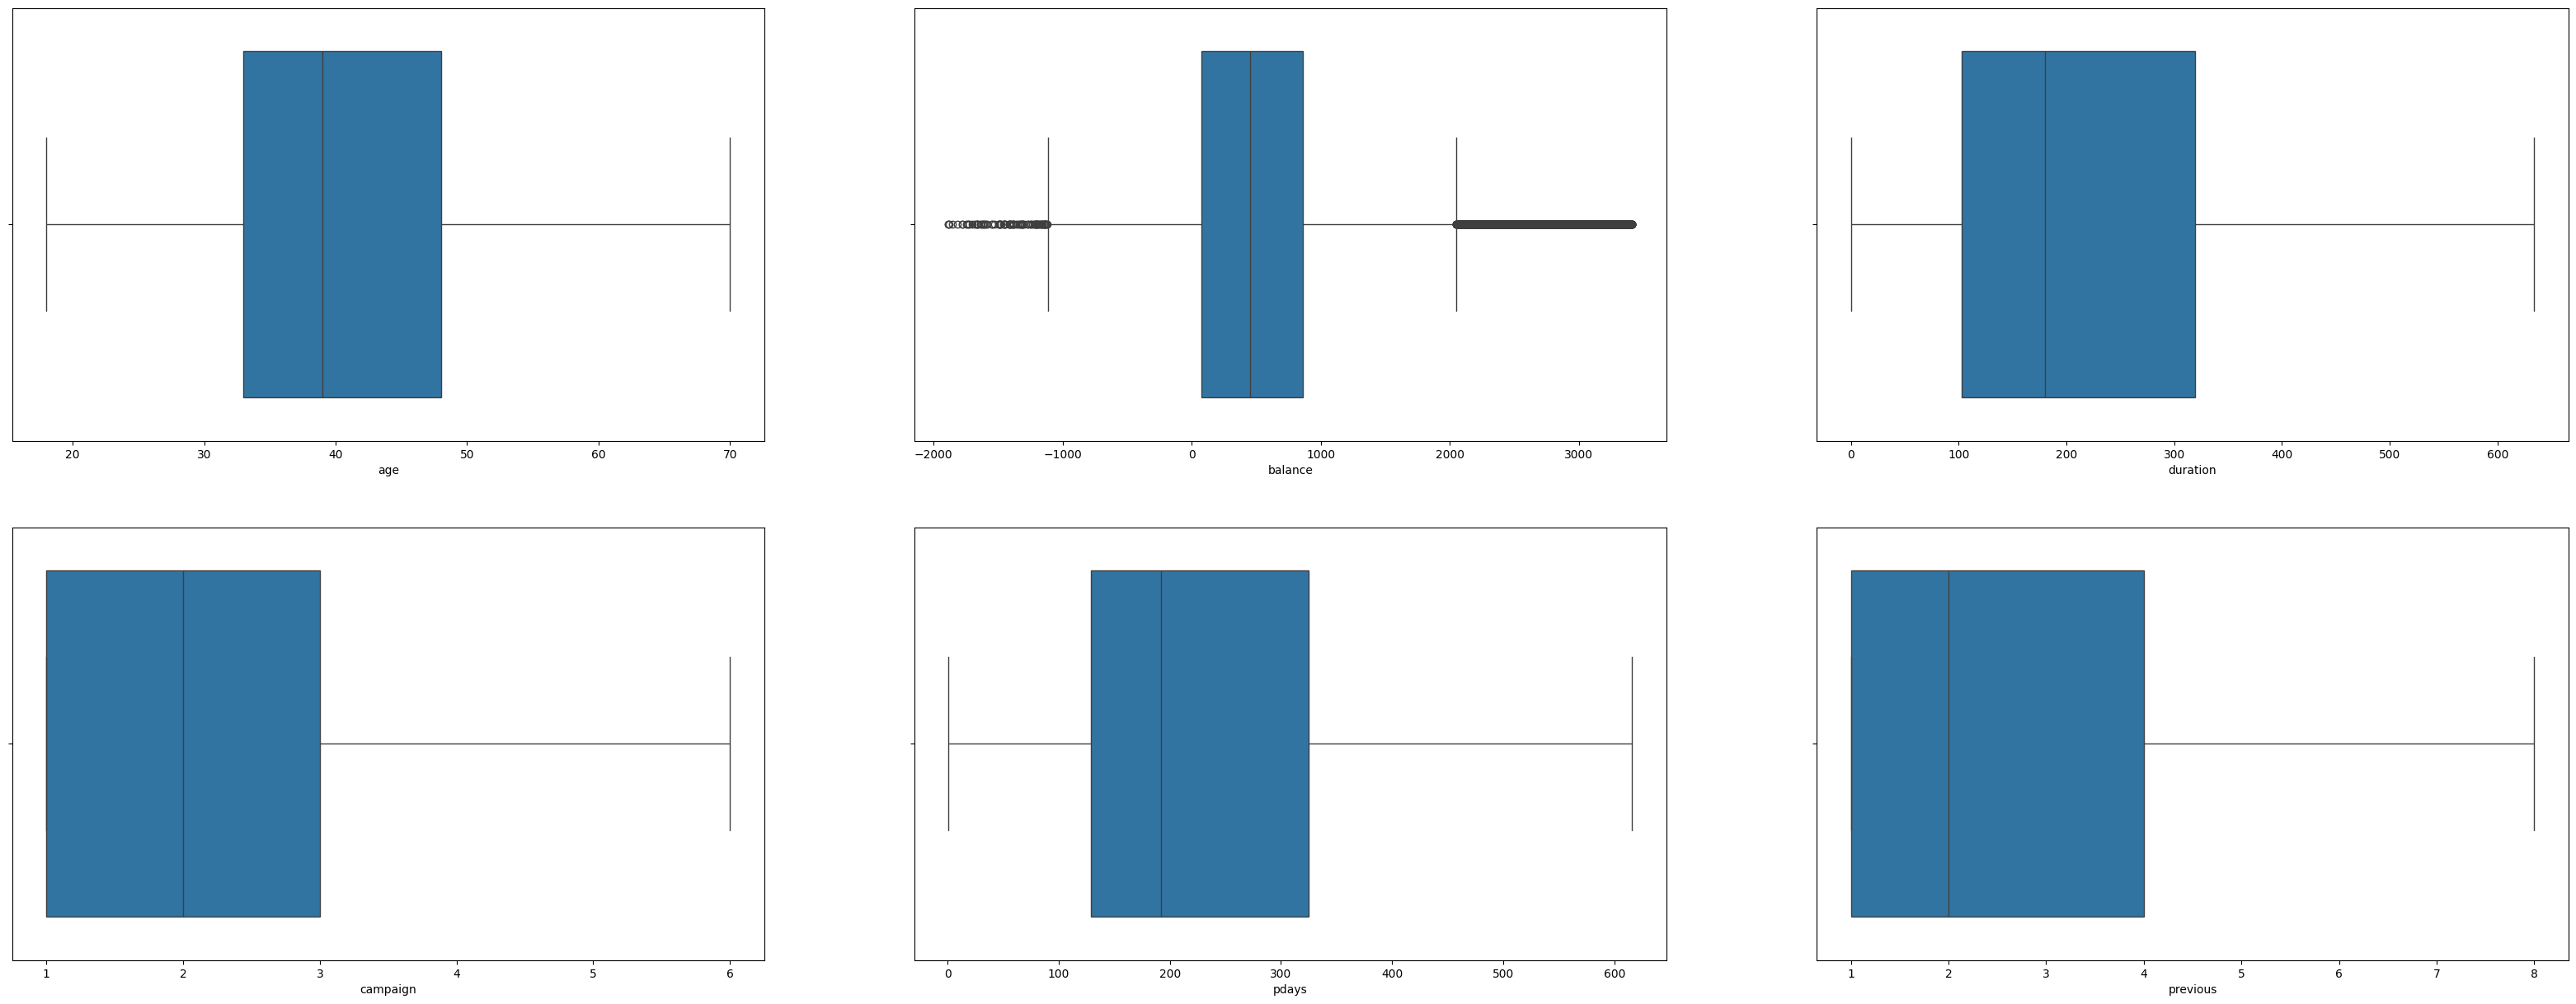

In [99]:
plt.figure(figsize=(40,15))
columns = numerical_df.columns
data = train_df.copy()

for idx,col in enumerate(columns):

    if col =='pdays':
        data = data[data[col]>-1]
     
    if col == 'previous':
        data = data[data[col]>0]   

    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3-q1

    upper = q3+1.5*iqr
    lower = q1-1.5*iqr

    data = data[(lower<data[col]) & (data[col]<upper)]

    if col!='pdays' or col!='previous':
        train_df[col] = np.where(train_df[col]>upper,data[col].sample(1),
                        np.where(train_df[col]<lower,data[col].sample(1),train_df[col]))

    if col =='pdays':
        train_df[col] = np.where(train_df[col]>upper,data[col].sample(1),
                    np.where((0<train_df[col]) & (train_df[col]<lower),data[col].sample(1),train_df[col]))
        plt.subplot(2,3,idx+1) 
        sns.boxplot(data = train_df[train_df[col]>-1],x = col)  
        continue             
     
    if col == 'previous':
        train_df[col] = np.where(train_df[col]>upper,data[col].sample(1),
                    np.where((0<train_df[col]) & (train_df[col]<lower),data[col].sample(1),train_df[col]))
        
        plt.subplot(2,3,idx+1) 
        sns.boxplot(data = train_df[train_df[col]>0],x = col)
        continue

    plt.subplot(2,3,idx+1) 
    sns.boxplot(data = train_df,x = col)                

<Axes: xlabel='age', ylabel='Count'>

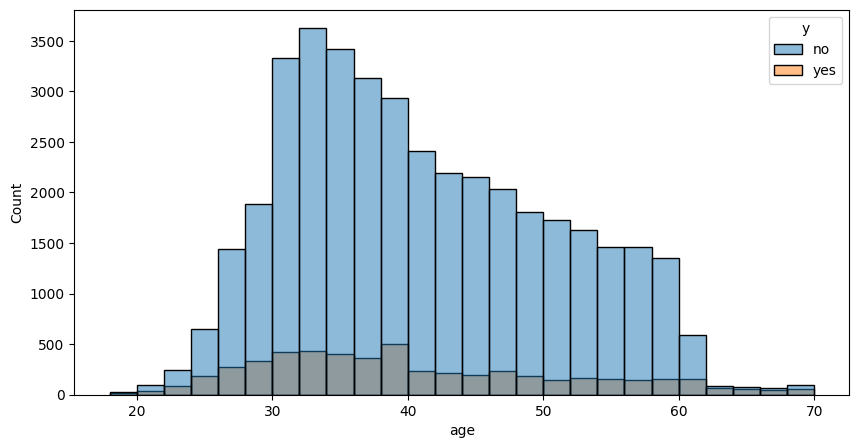

In [100]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "age",hue = "y",binwidth=2)

<Axes: xlabel='balance', ylabel='Count'>

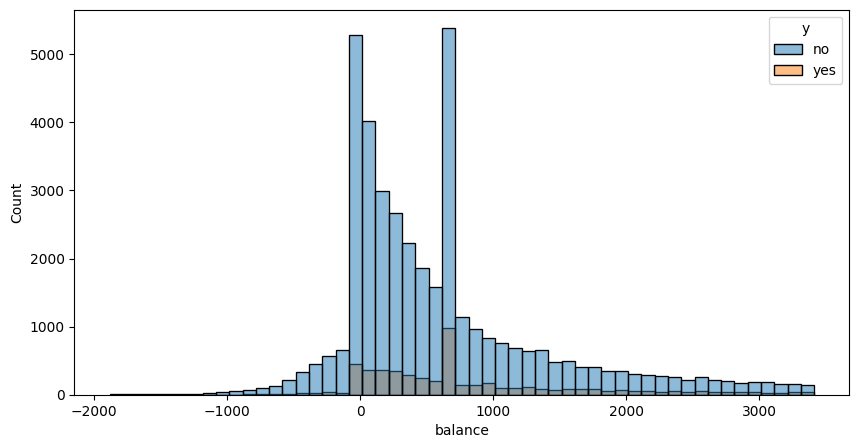

In [101]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "balance",hue = "y",binwidth=100)

<Axes: xlabel='duration', ylabel='Count'>

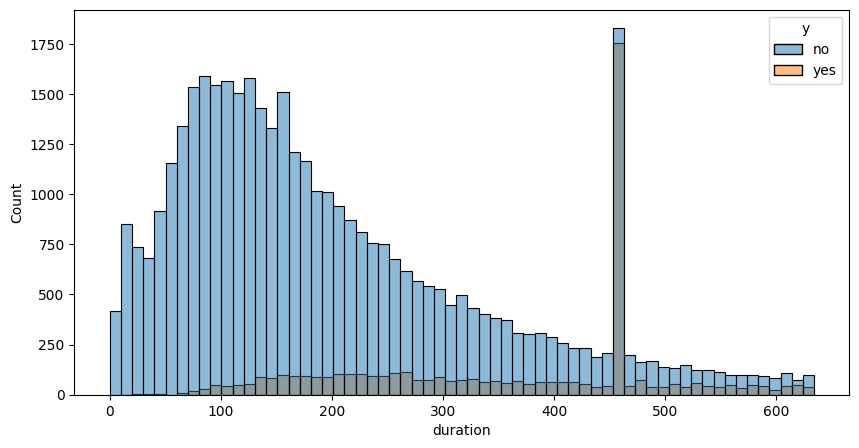

In [102]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "duration",hue = "y",binwidth=10)

<Axes: xlabel='campaign', ylabel='Count'>

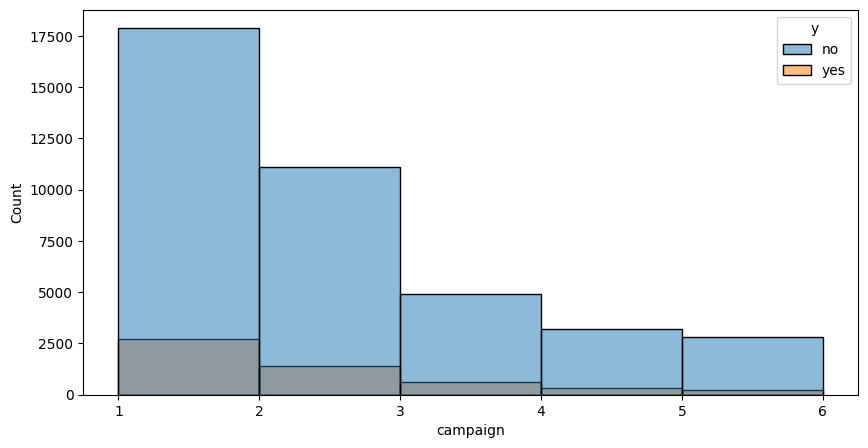

In [103]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "campaign",hue = "y",binwidth=1)

<Axes: xlabel='pdays', ylabel='Count'>

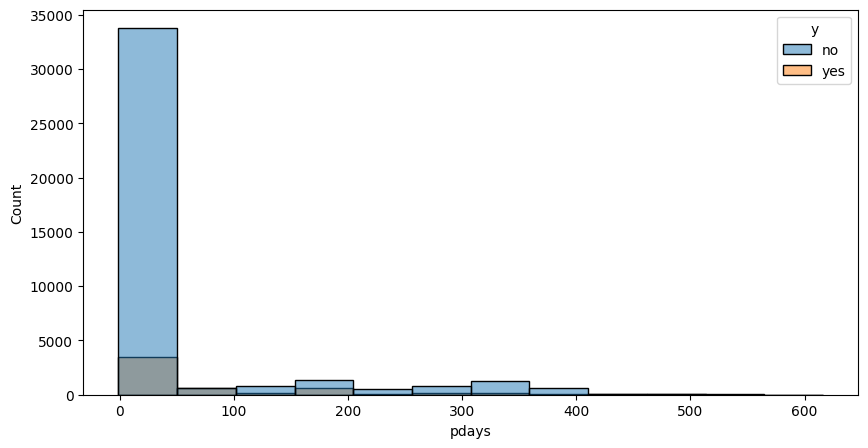

In [104]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "pdays",hue = "y",binwidth=50)

<Axes: xlabel='previous', ylabel='Count'>

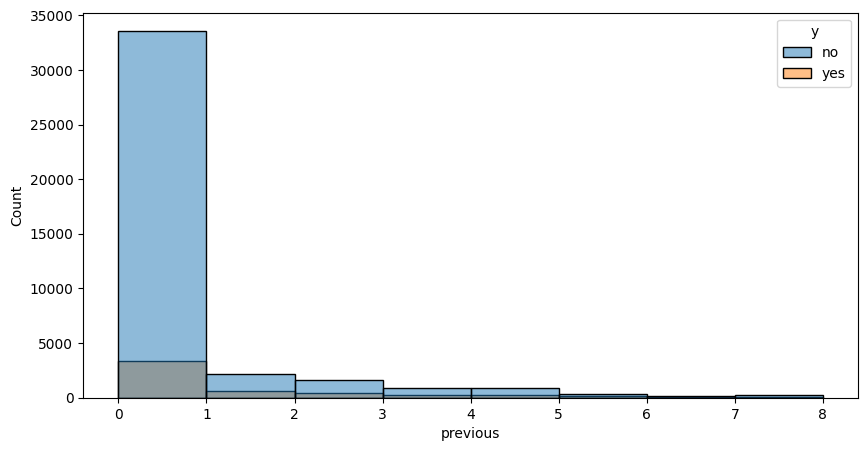

In [105]:
plt.figure(figsize=(10,5))

sns.histplot(data = train_df,x = "previous",hue = "y",binwidth=1)

In [106]:
train_df["duration"].shape[0]
41409+3802

45211

In [107]:
pd.crosstab(train_df["marital"],train_df["y"])

y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912

In [100]:
train_df[train_df["duration"]>=700].shape[0]

2680

In [96]:
train_df[train_df["duration"]<600].shape[0]

41409

In [98]:
pd.crosstab([train_df["duration"]>=700],train_df["y"])

y            no   yes
duration             
False     38664  3867
True       1258  1422

In [101]:
(1422/2680)*100

53.059701492537314

#### `From KDE we can deduce that there is no difference in range of age, day, duration, pdays and previous for people opting and not opting for TERM-DEPOSIT`

# Categorical Analysis

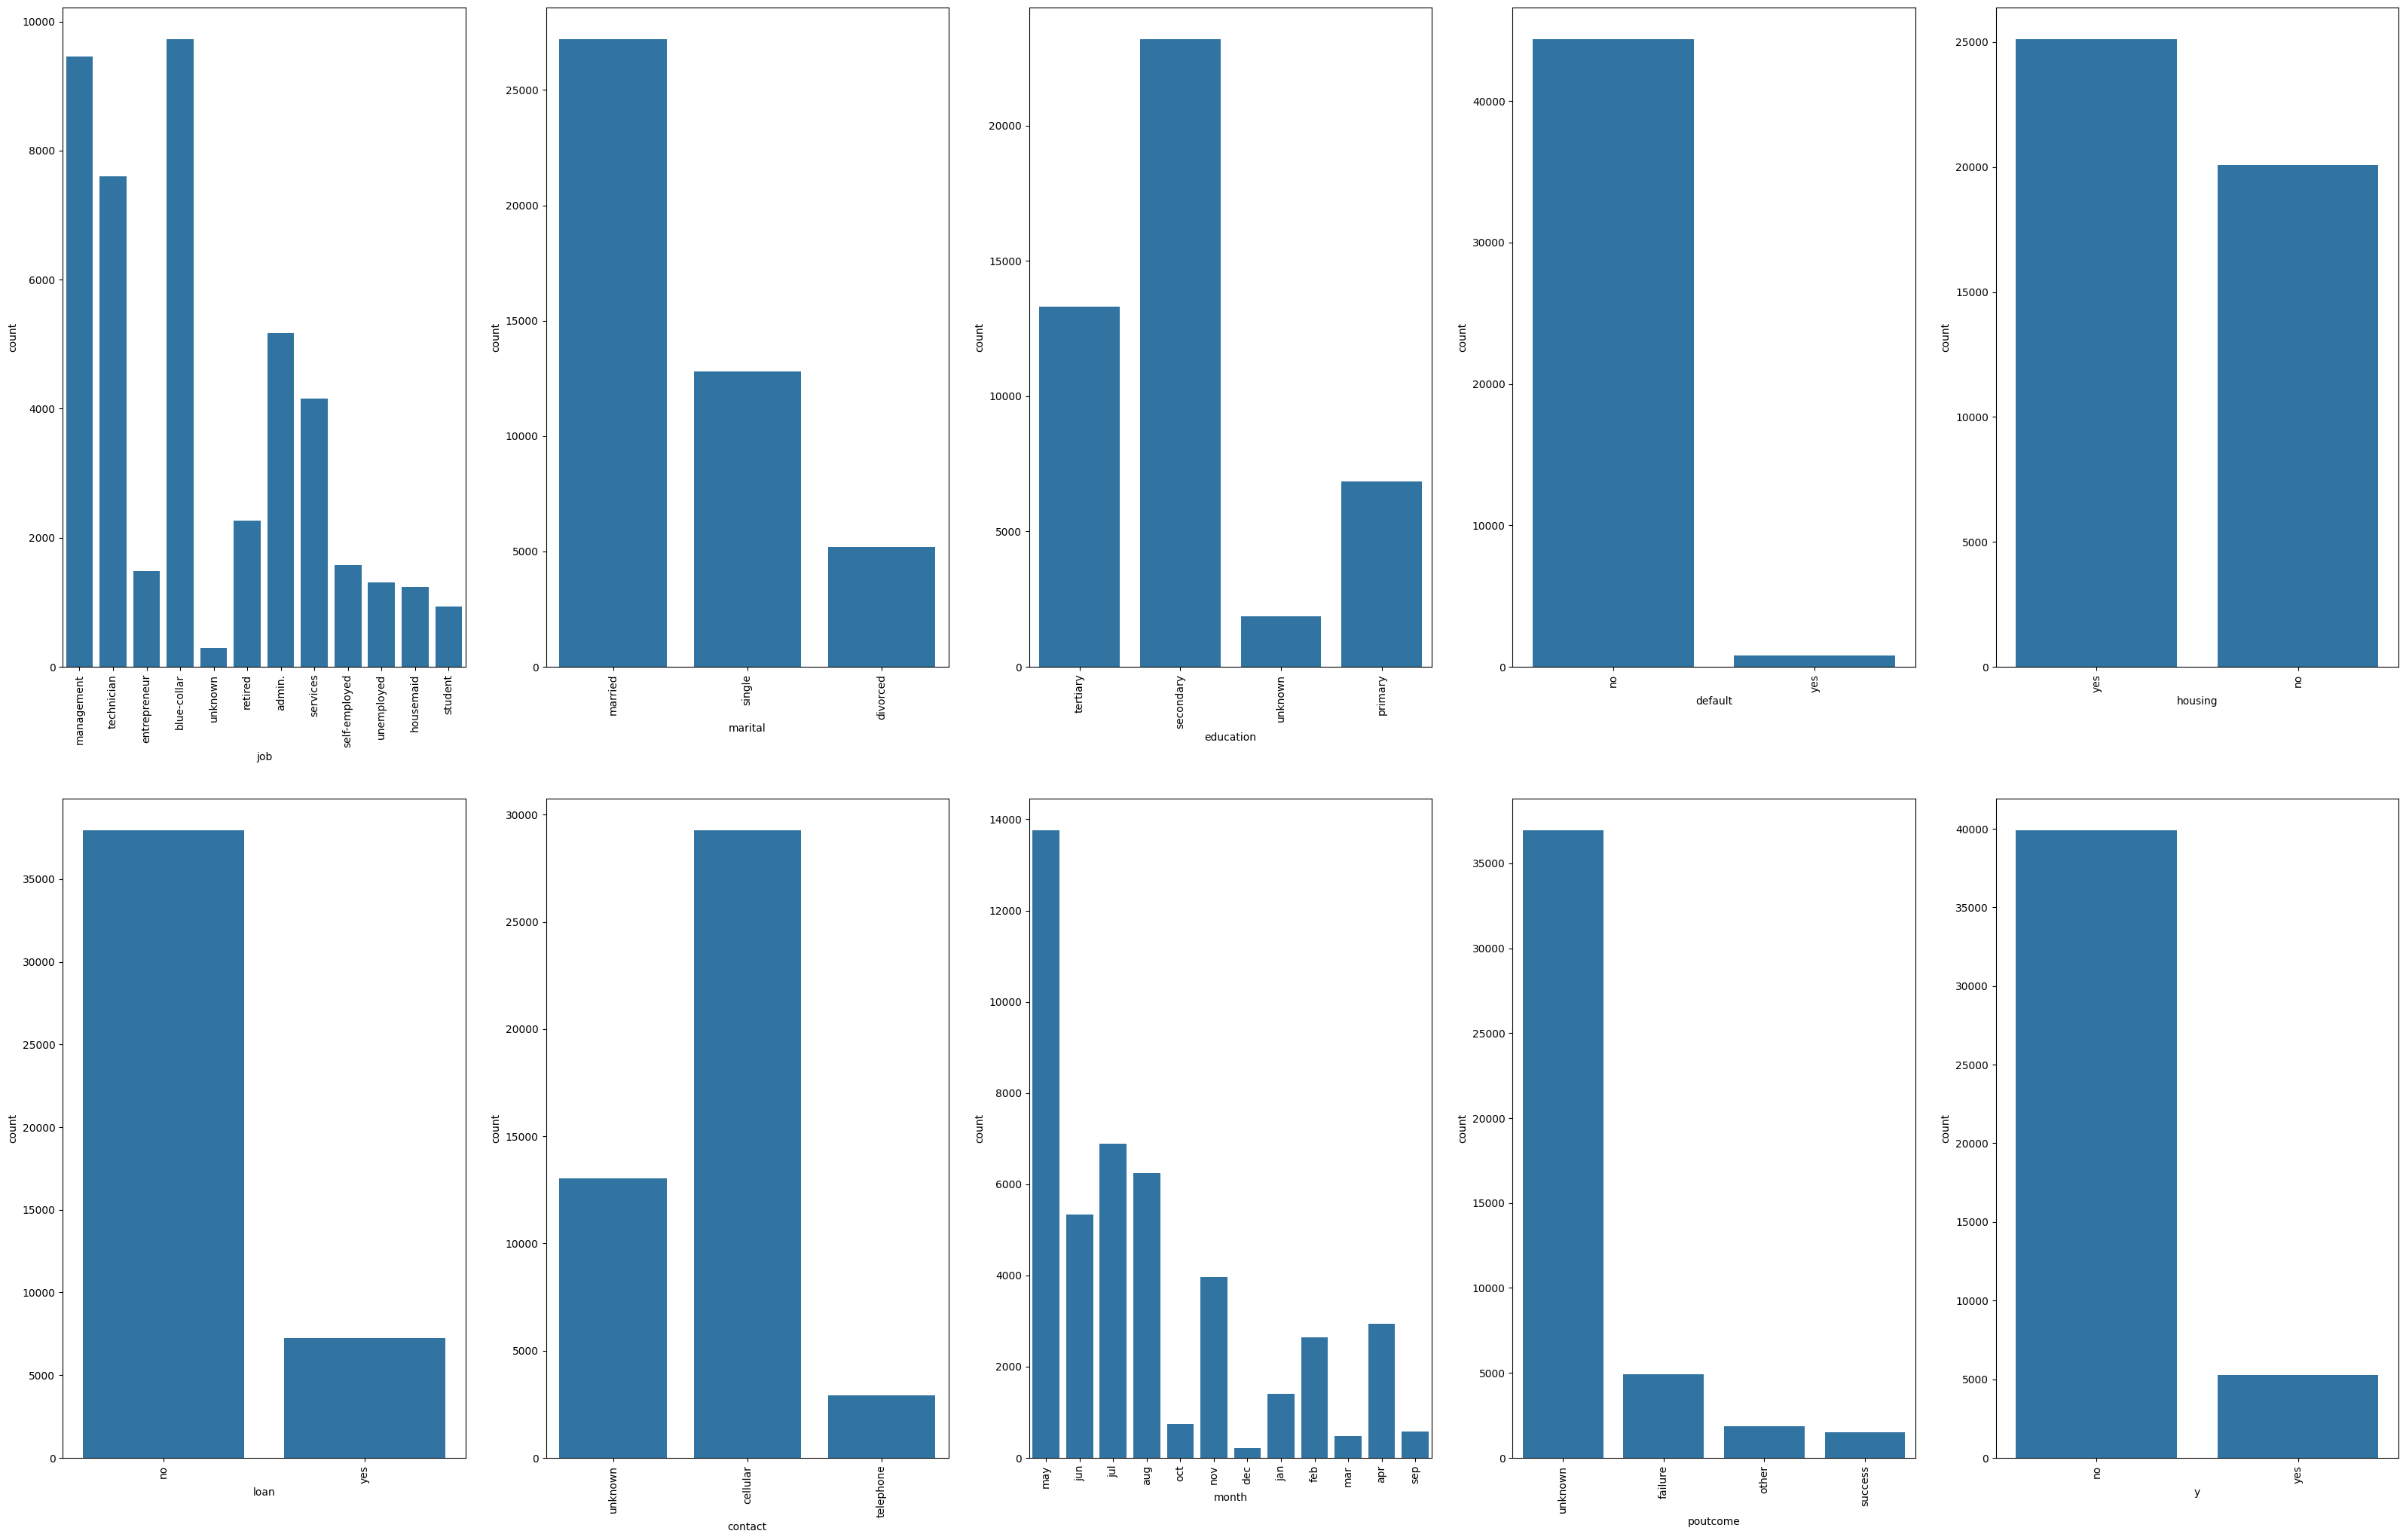

In [14]:
plt.figure(figsize=(40,25))

columns = categorical_df.columns

for idx,col in enumerate(columns):
    plt.subplot(2,5,idx+1) 
    sns.countplot(data = categorical_df,x=col)
    plt.xticks(rotation = 90)

#### `From above we can get to know that data is imbalanced and insights dran from such data will be a biased insight`

## Balancing the data

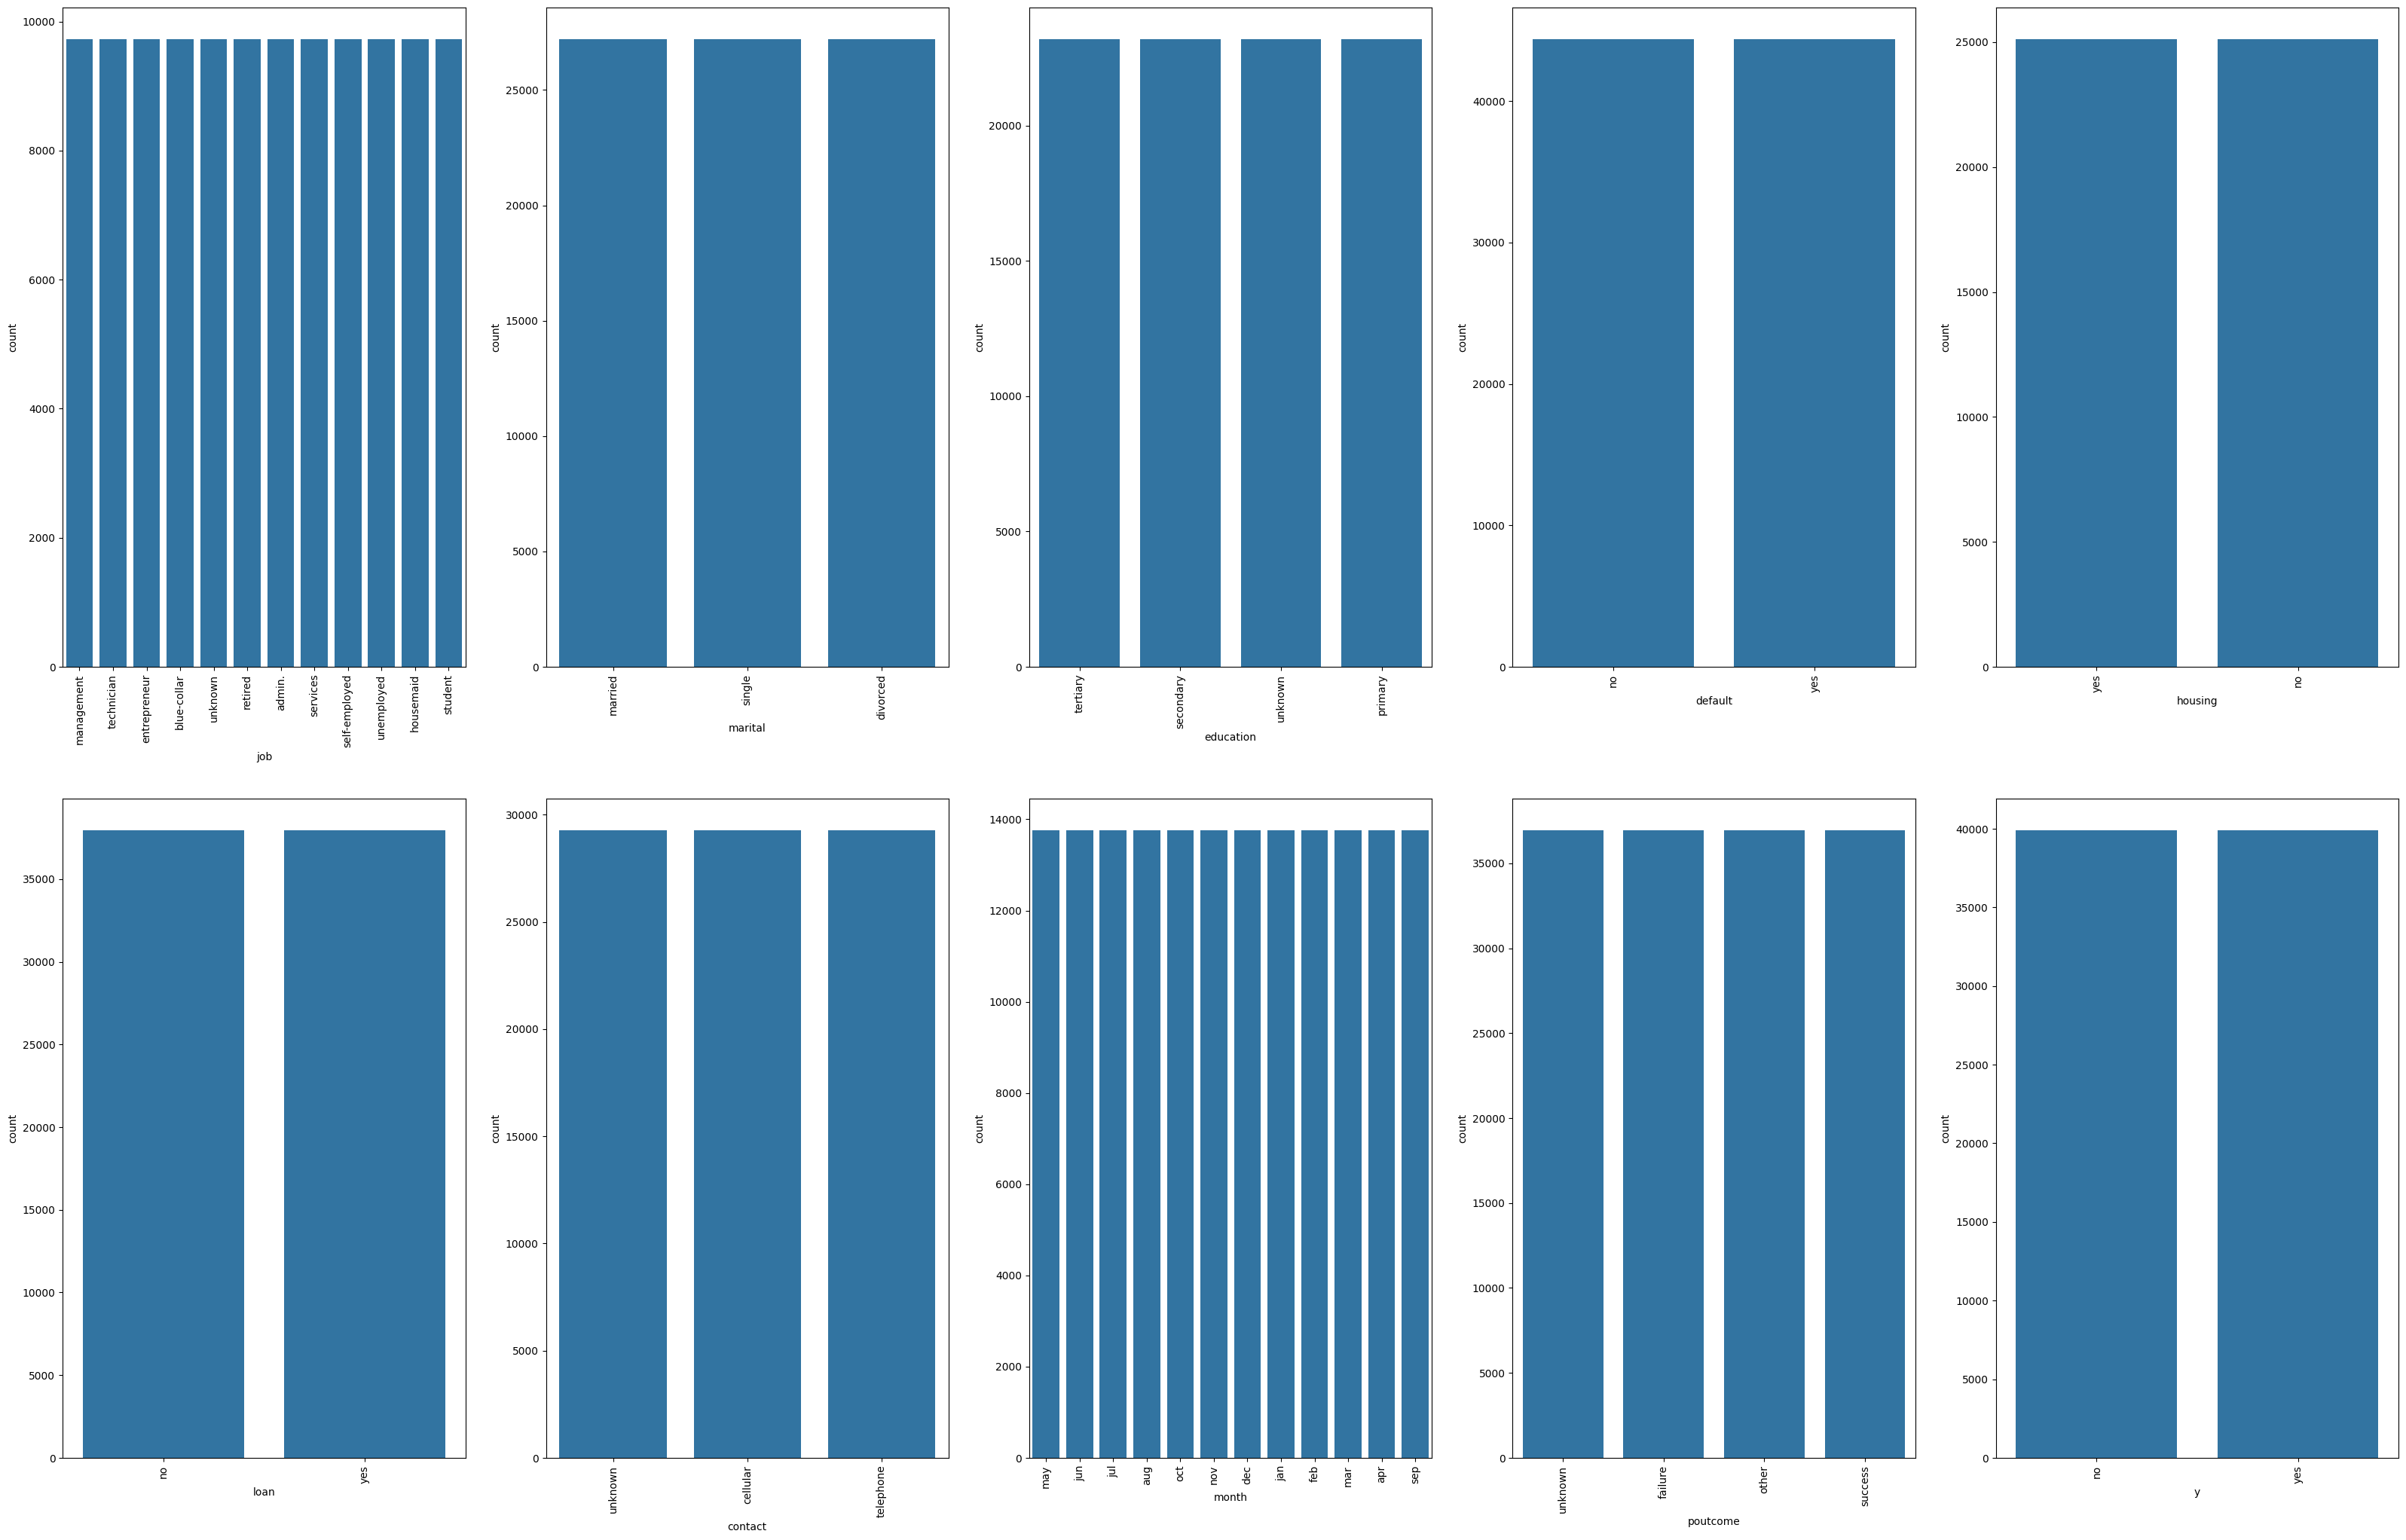

In [15]:
categorical_columns = categorical_df.columns
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(2,5,idx) 
    sns.countplot(data = temp_balanced_data,x=col)
    plt.xticks(rotation = 90)

    idx+=1
            

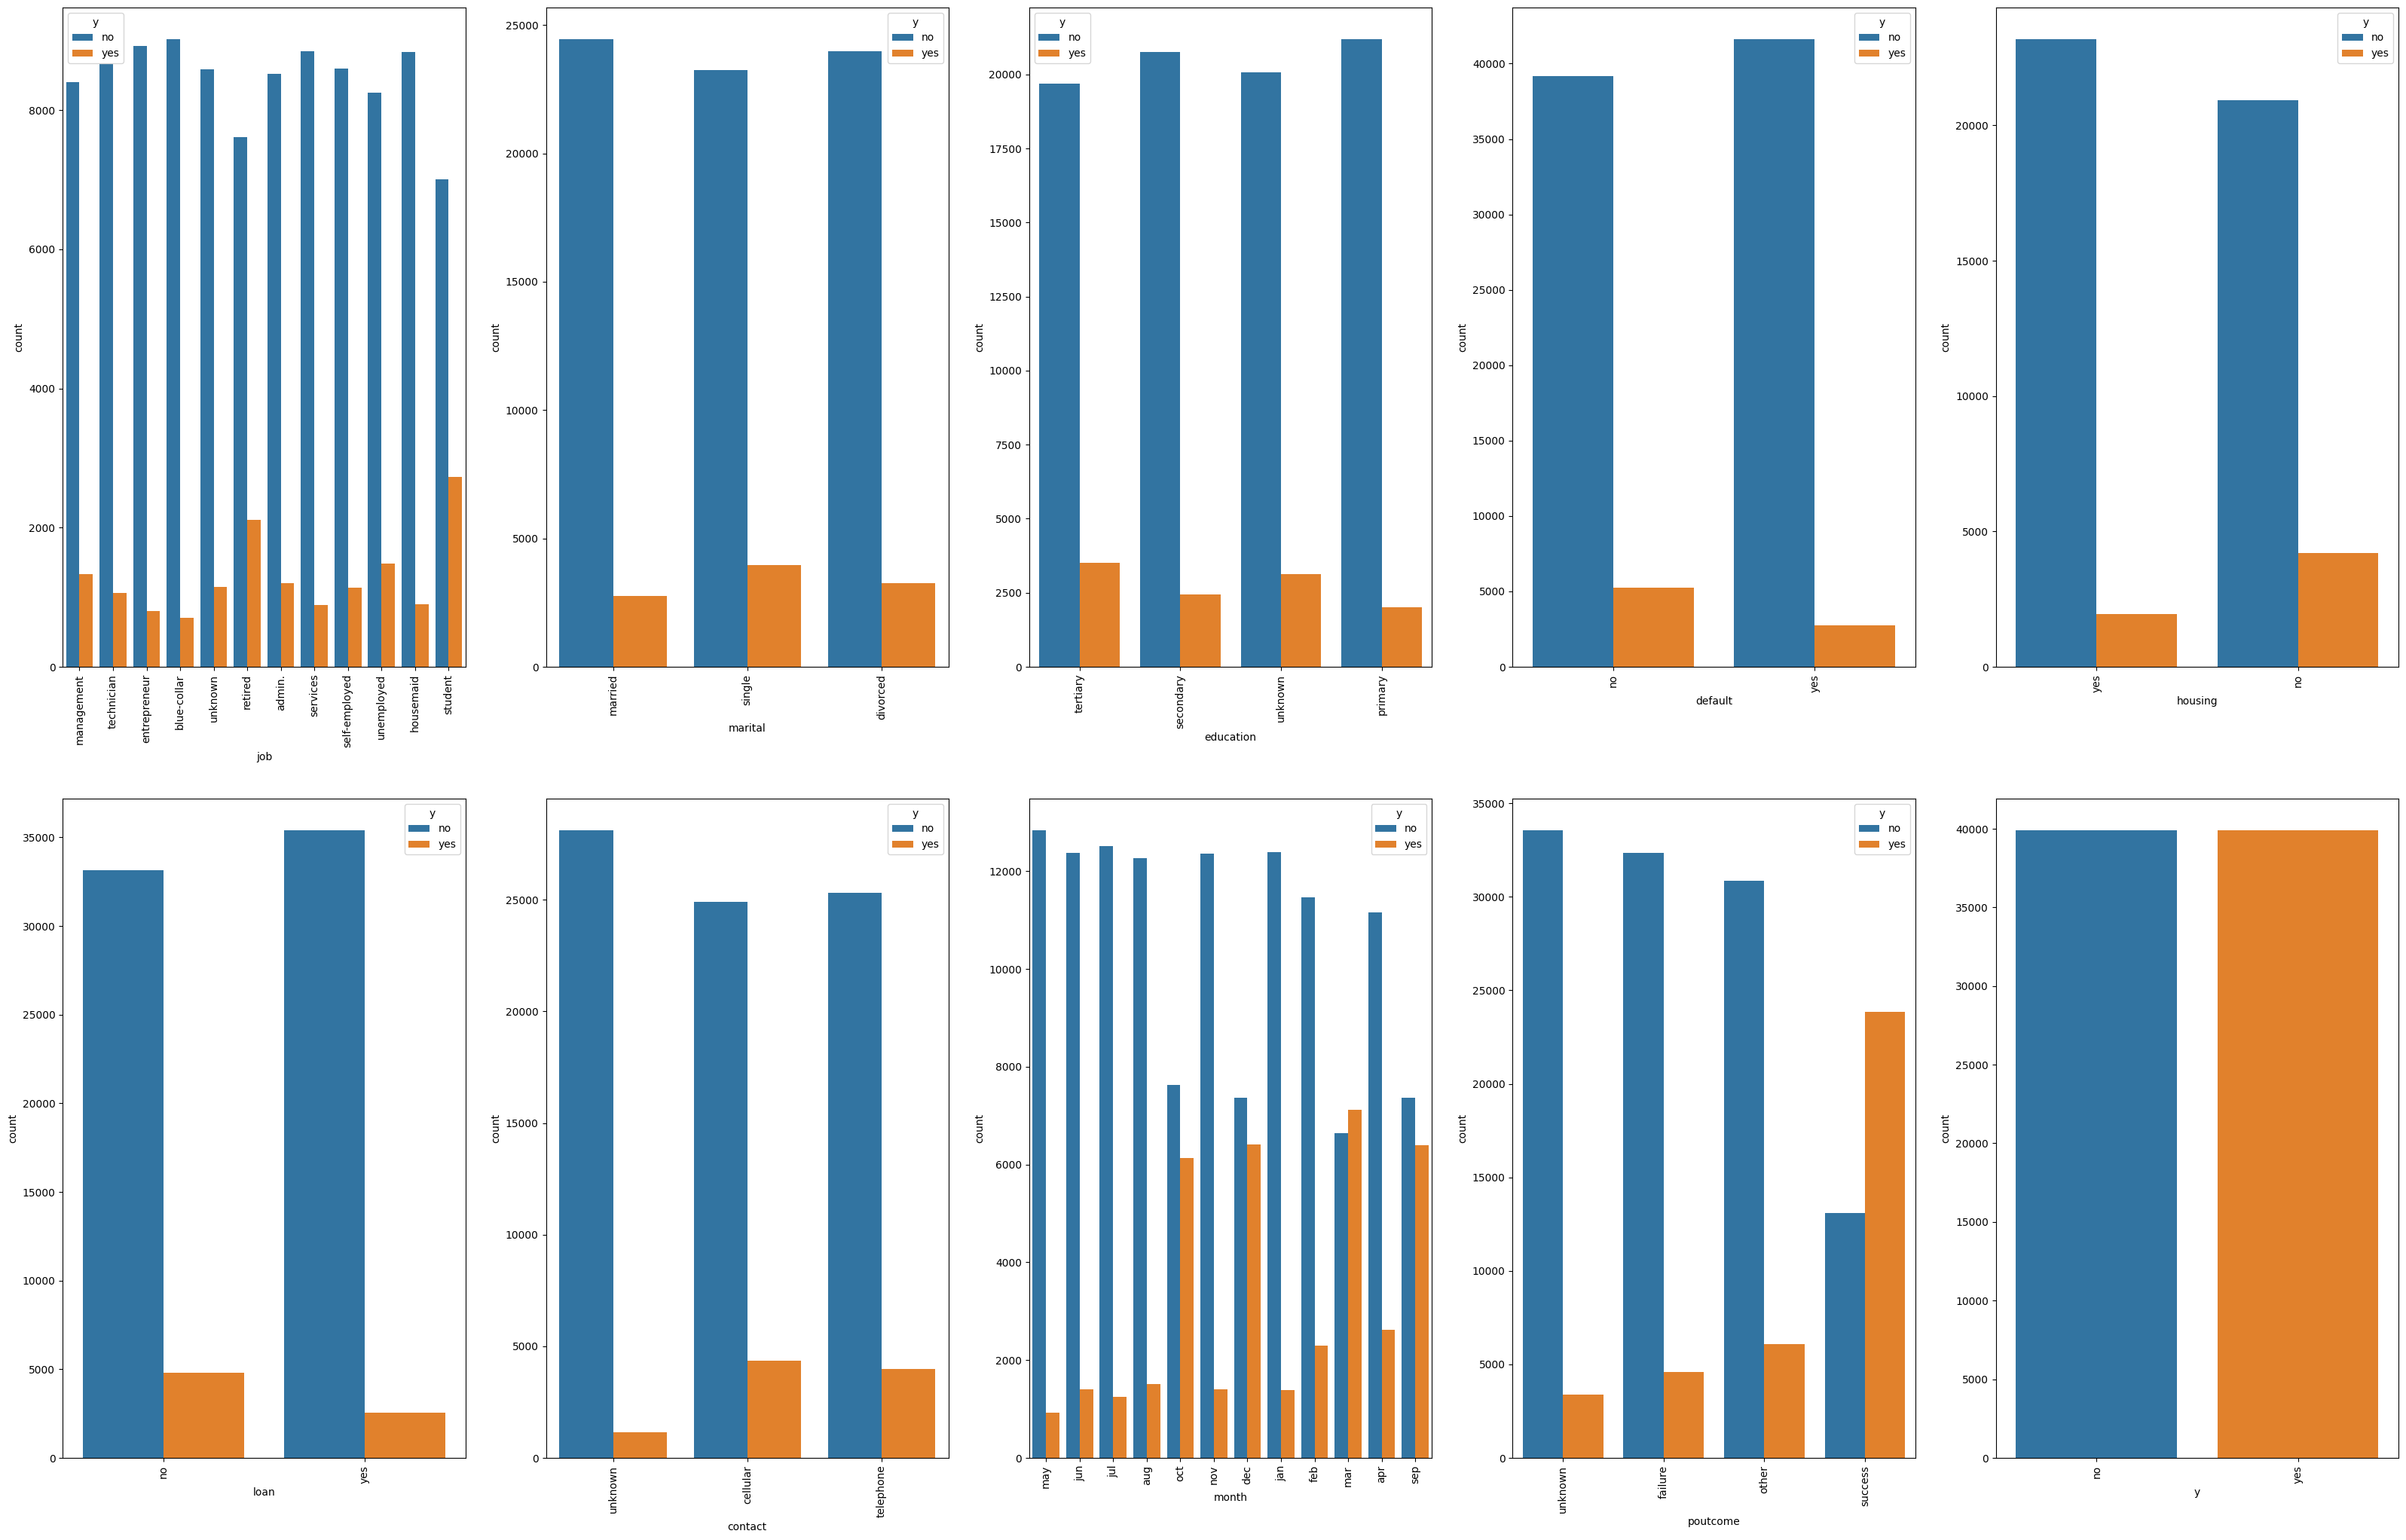

In [16]:
categorical_columns = categorical_df.columns
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(2,5,idx) 
    sns.countplot(data = temp_balanced_data,x=col,hue = "y")
    plt.xticks(rotation = 90)

    idx+=1
            


<Axes: xlabel='count', ylabel='job'>

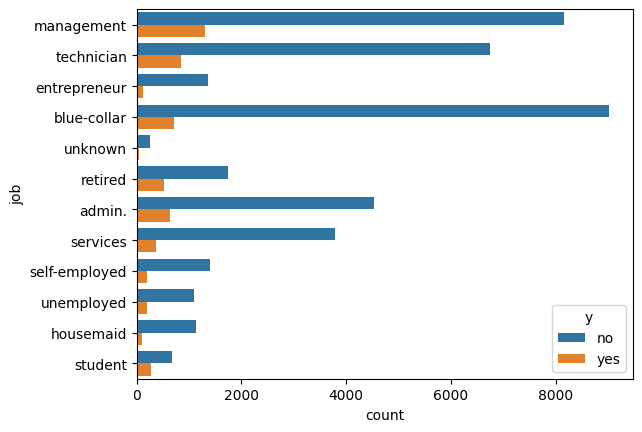

In [111]:
sns.countplot(train_df,y="job",hue="y")
# plt.xticks(rotation = )

In [112]:
pd.crosstab(train_df["job"],train_df["y"],normalize="index")

y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056

In [116]:
train_df["y"].value_counts(normalize = True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

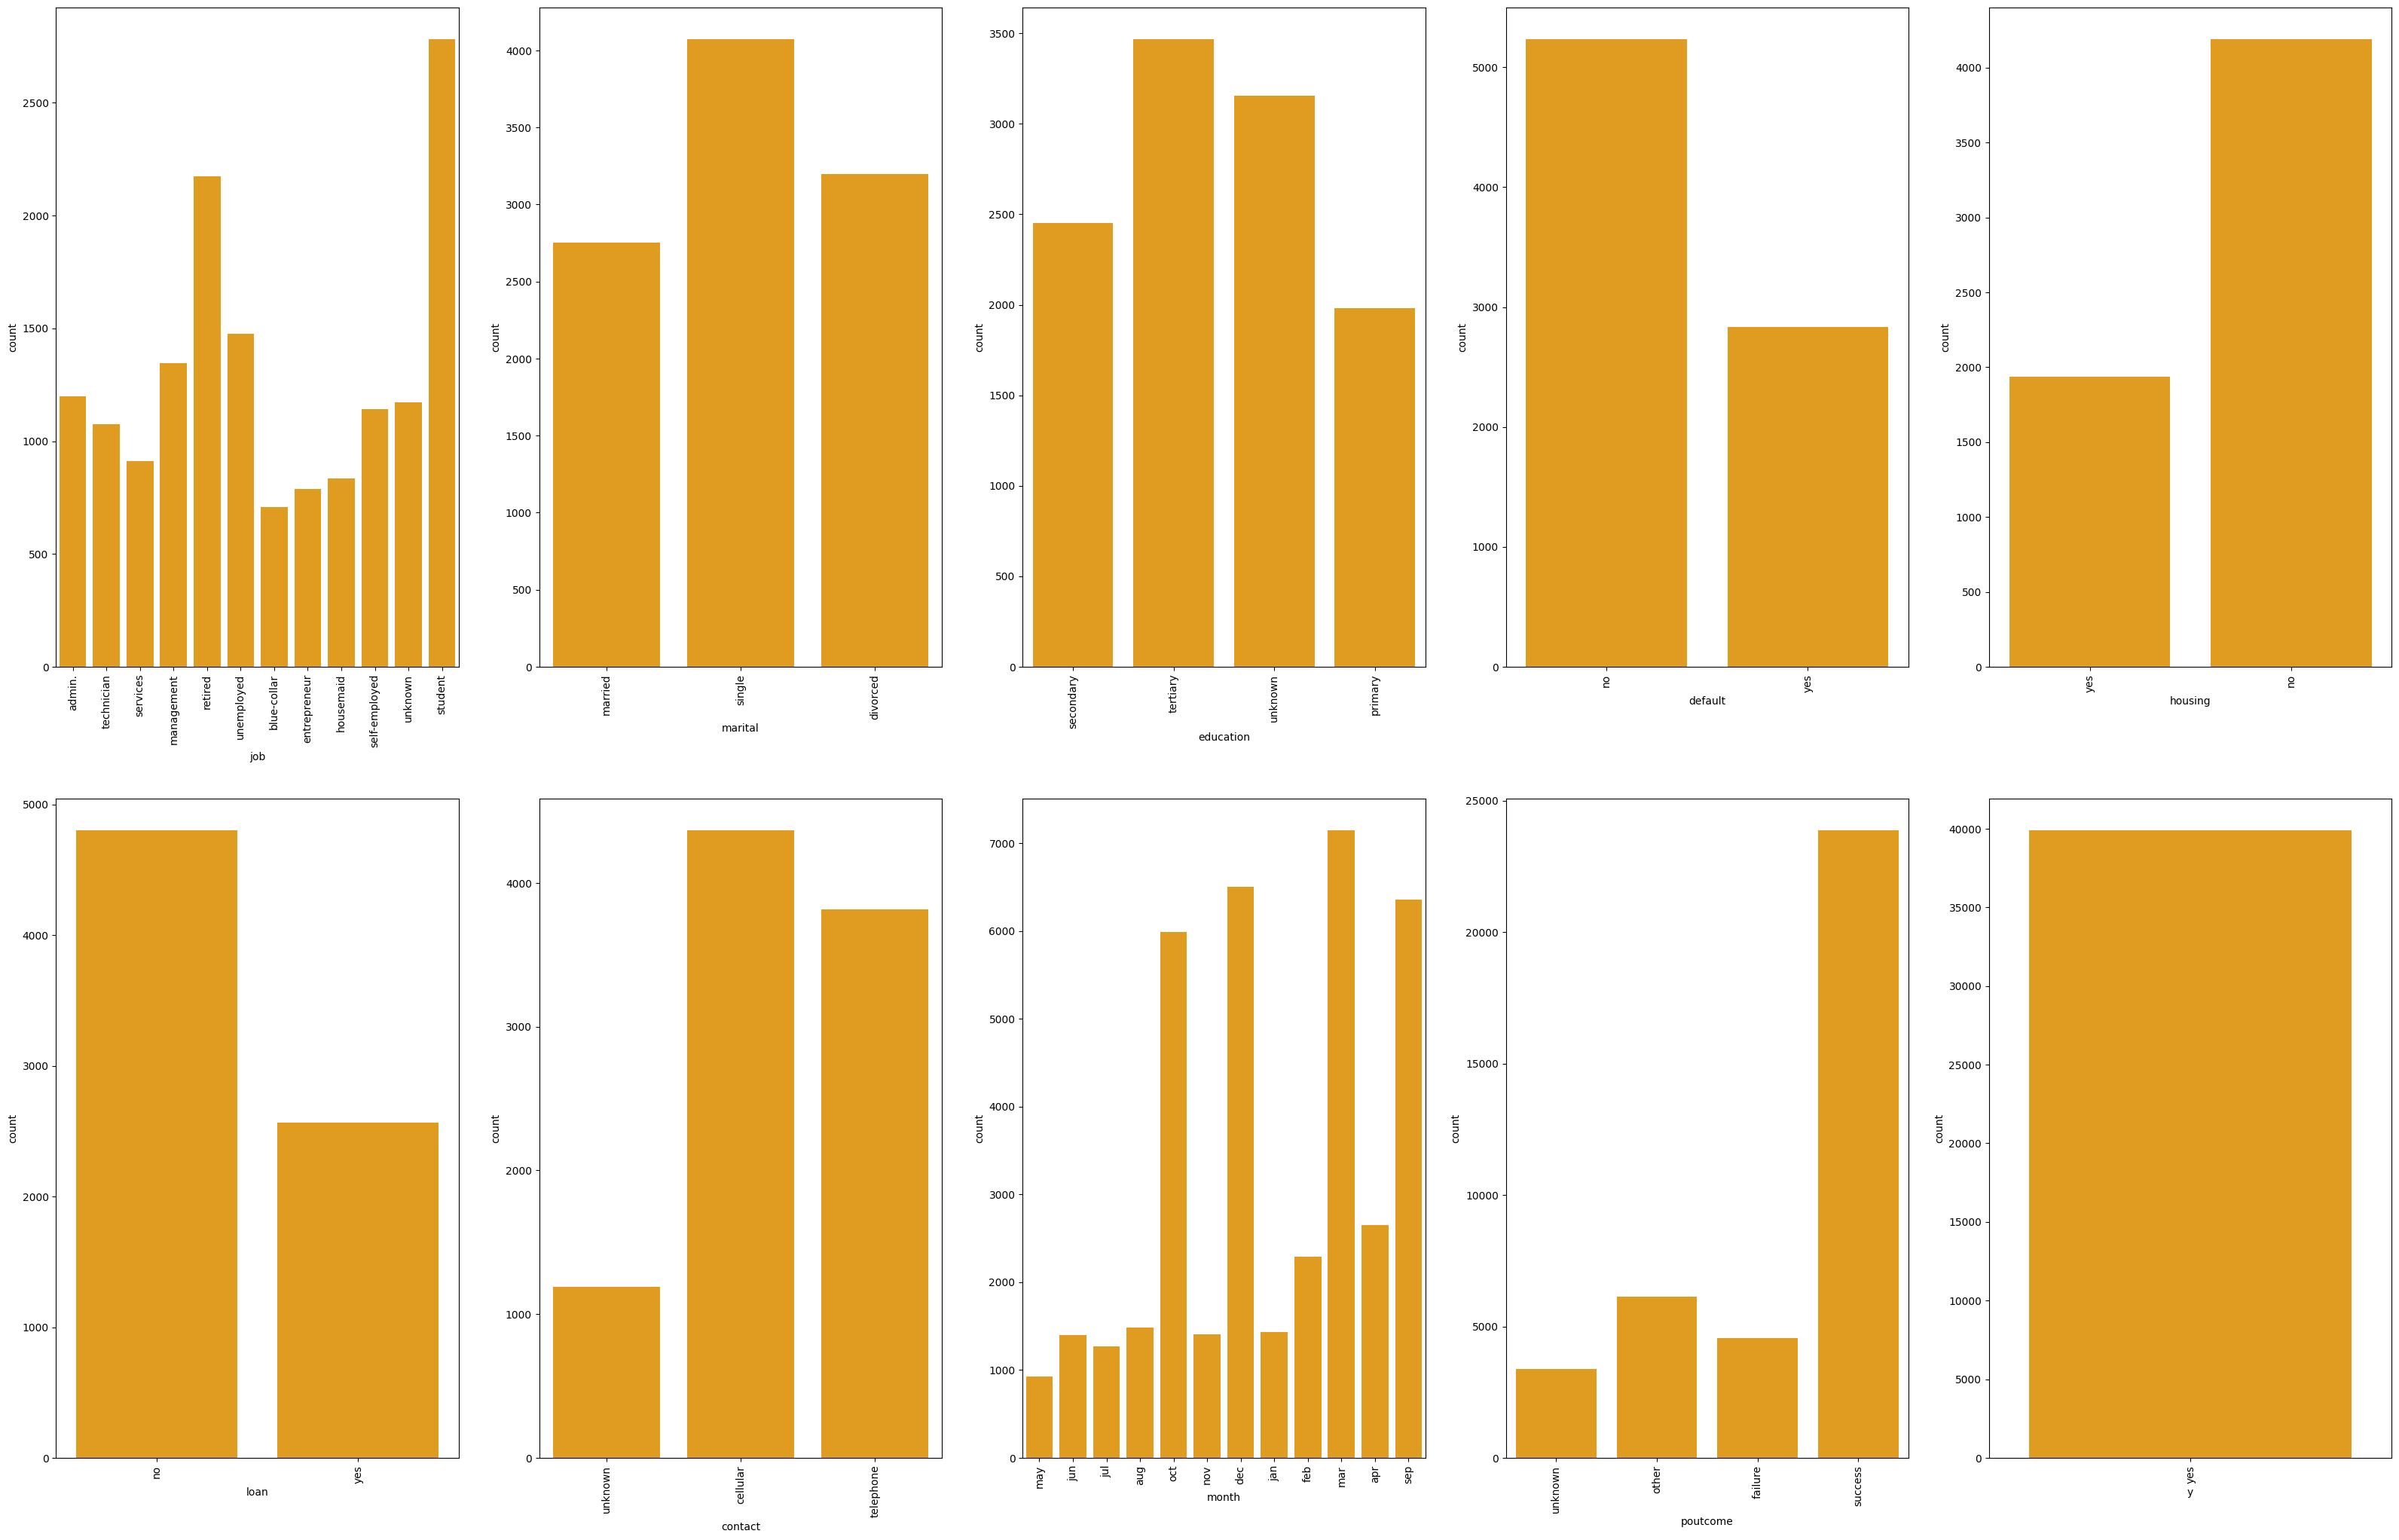

In [17]:
categorical_columns = categorical_df.columns
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(2,5,idx) 
    sns.countplot(data = temp_balanced_data[temp_balanced_data["y"]=="yes"],x=col,color="orange")
    plt.xticks(rotation = 90)

    idx+=1
            


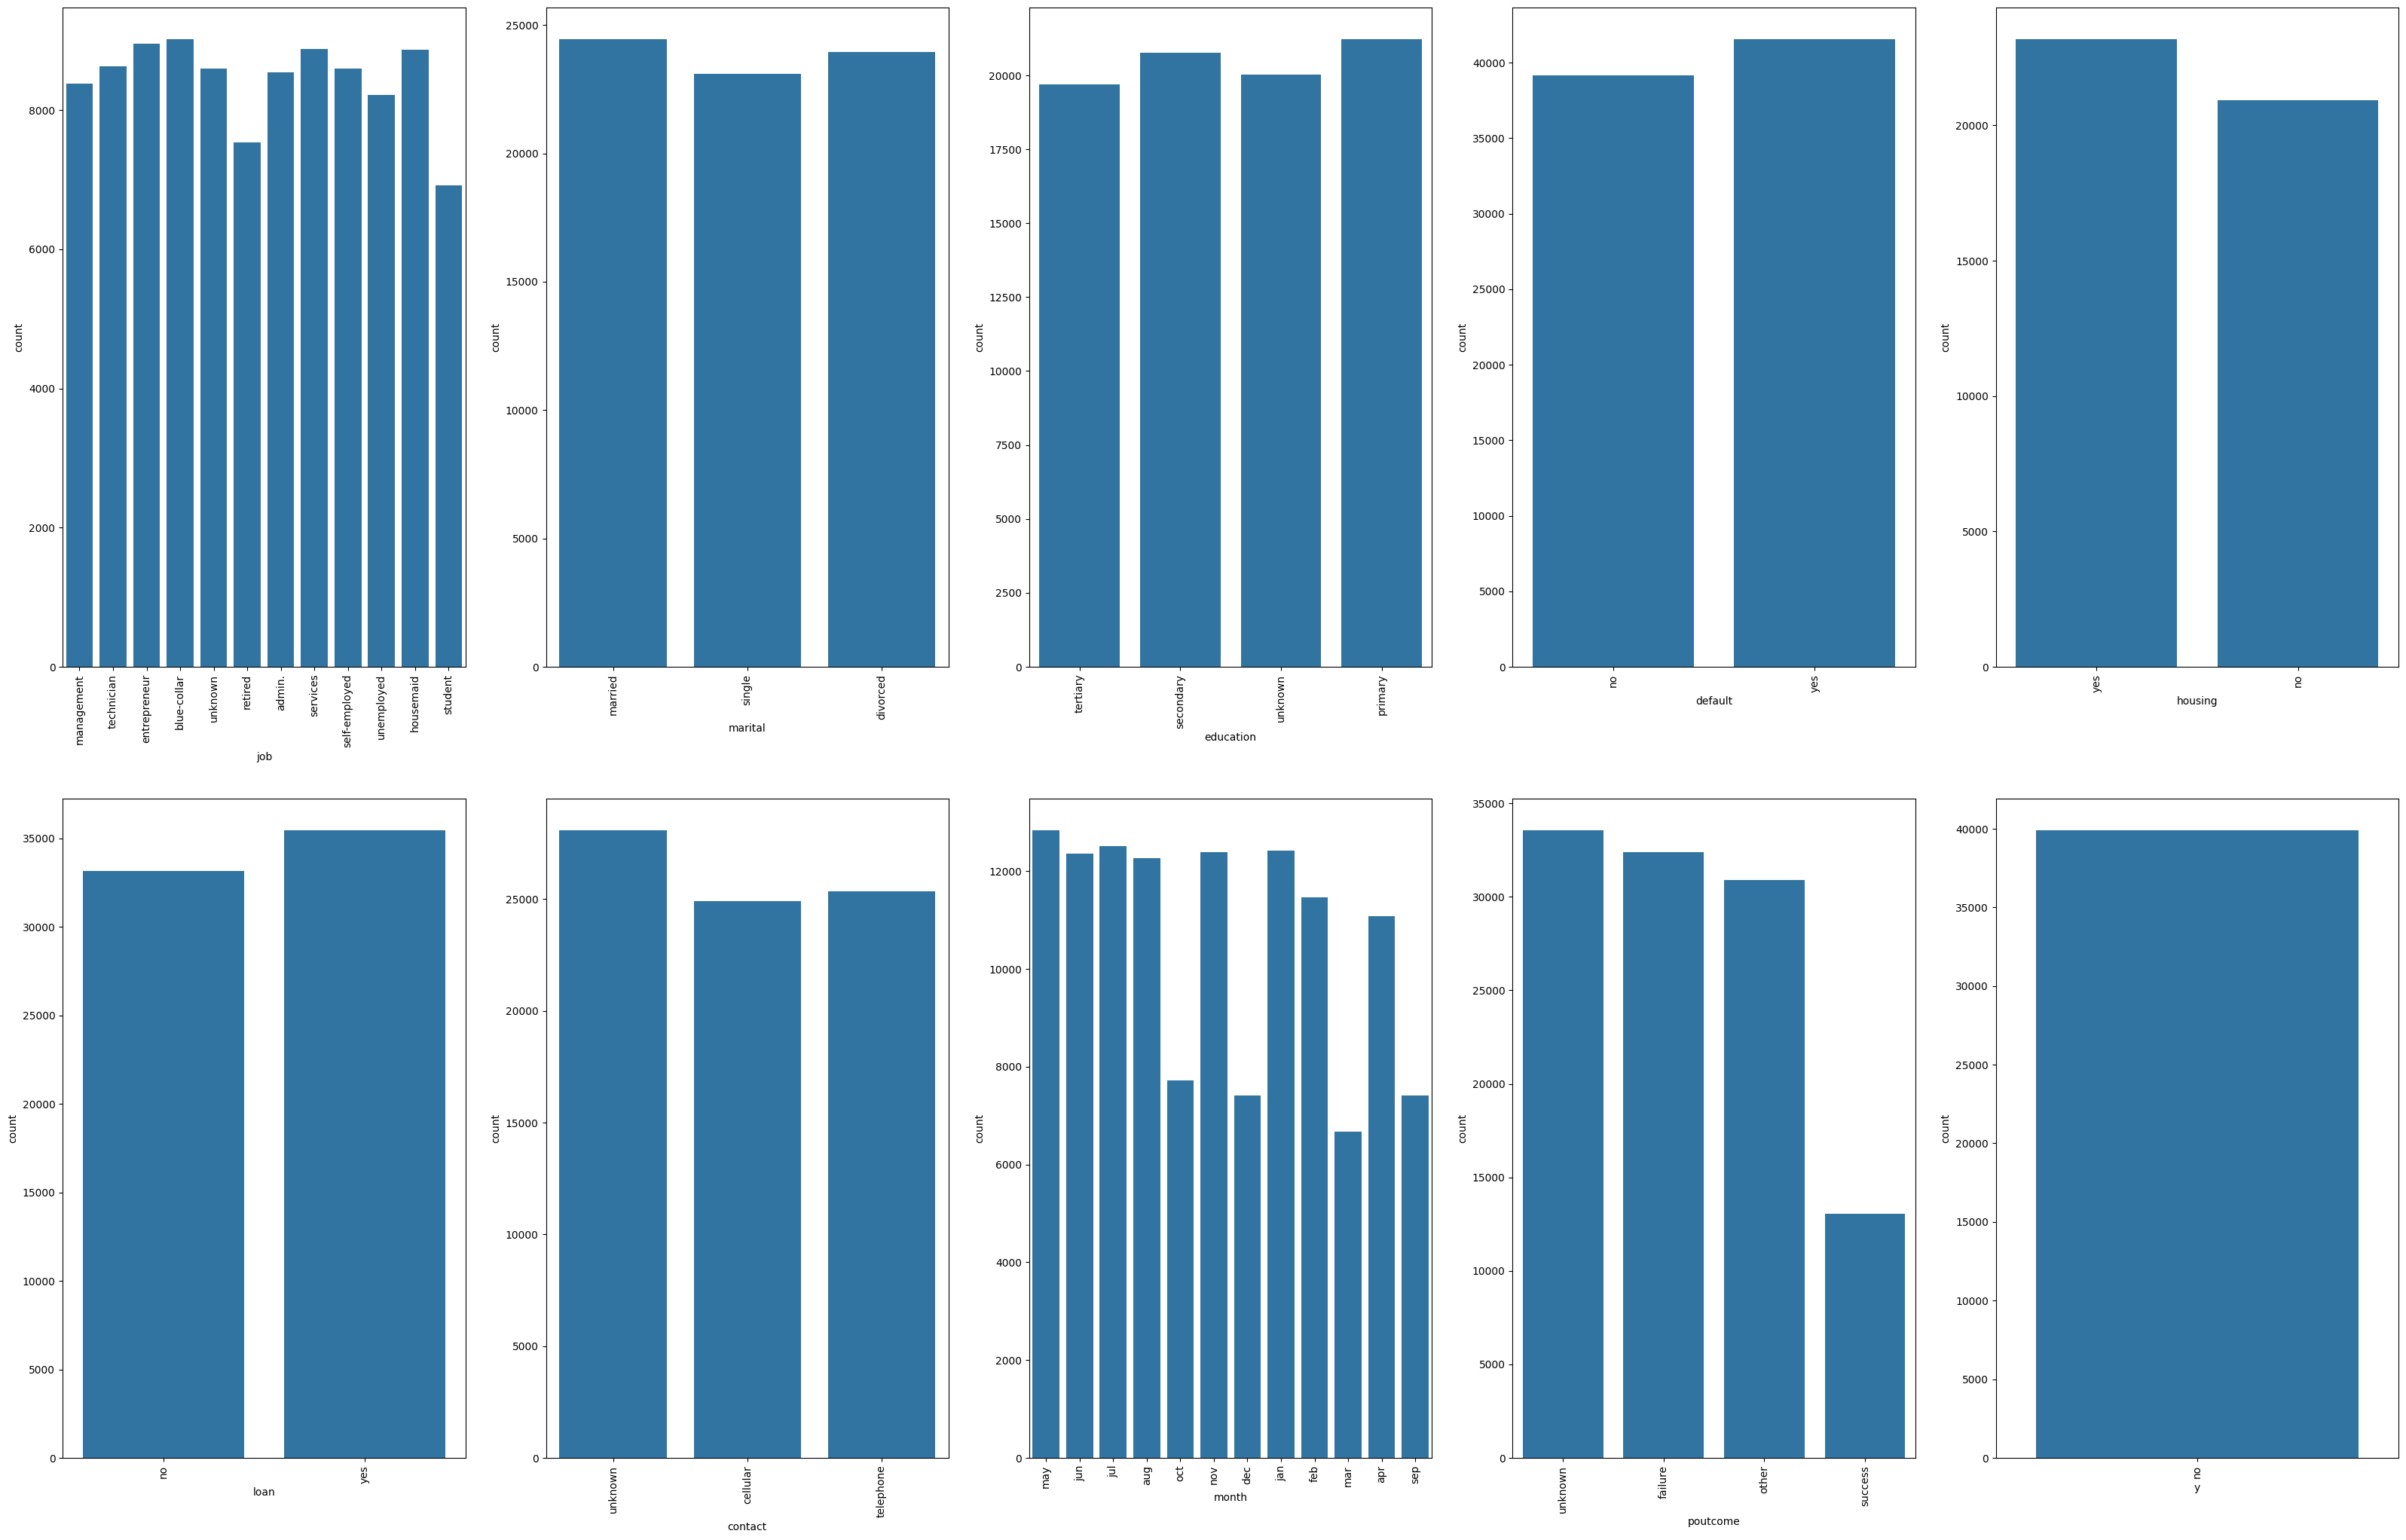

In [19]:
categorical_columns = categorical_df.columns
plt.figure(figsize=(40,25))
idx = 1

for col in categorical_columns:

    labels = train_df[col].unique()
    labels_frequency_data = train_df[col].value_counts()
    most_frequent_label = labels_frequency_data.index[0]
    highest_label_frequency = labels_frequency_data.values[0]
  
    temp_balanced_data = train_df.copy()

    for label in labels:
        if label!=most_frequent_label:
       
            specific_label_data = train_df[train_df[col]==label]
            label_frequency = specific_label_data.shape[0]
            sample_count = highest_label_frequency - label_frequency
            sampled_data = specific_label_data.sample(sample_count,replace=True)
            temp_balanced_data = pd.concat([temp_balanced_data,sampled_data])
          
    plt.subplot(2,5,idx) 
    sns.countplot(data = temp_balanced_data[temp_balanced_data["y"]=="no"],x=col)
    plt.xticks(rotation = 90)

    idx+=1
            


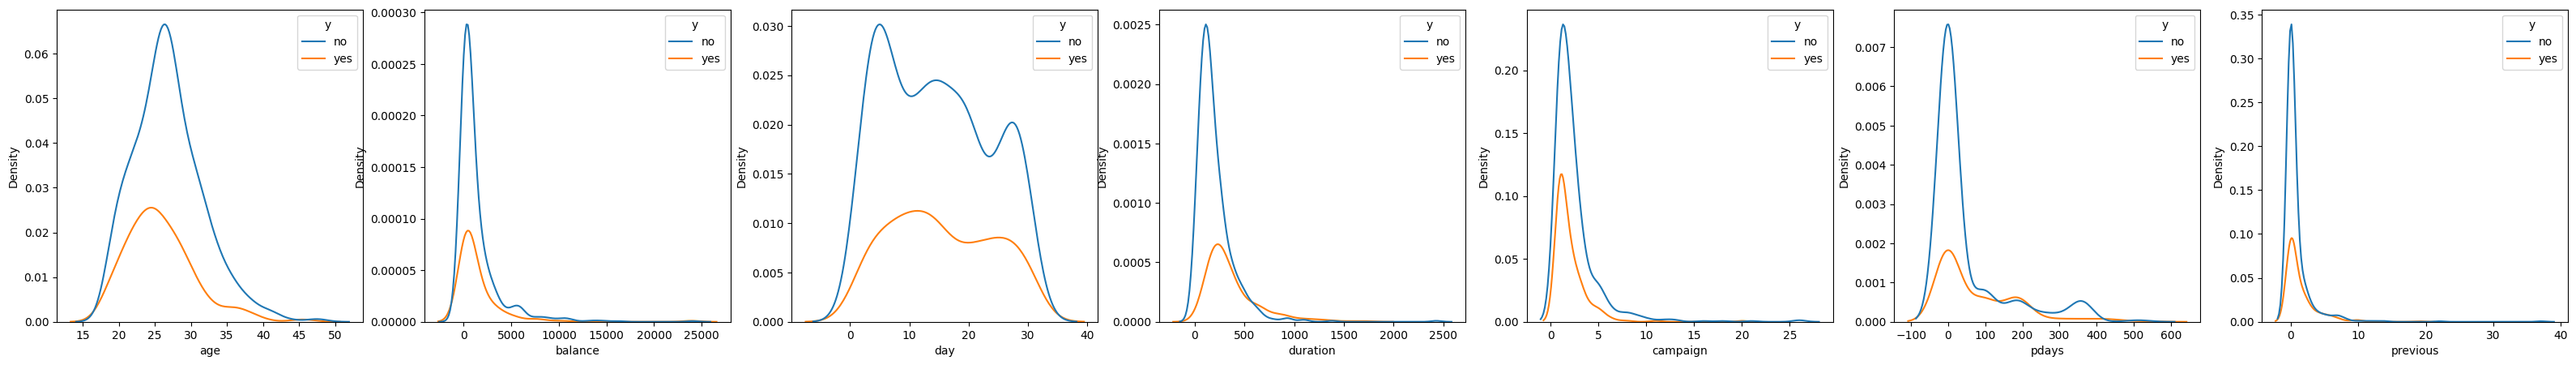

In [29]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student")],x = col,hue="y")

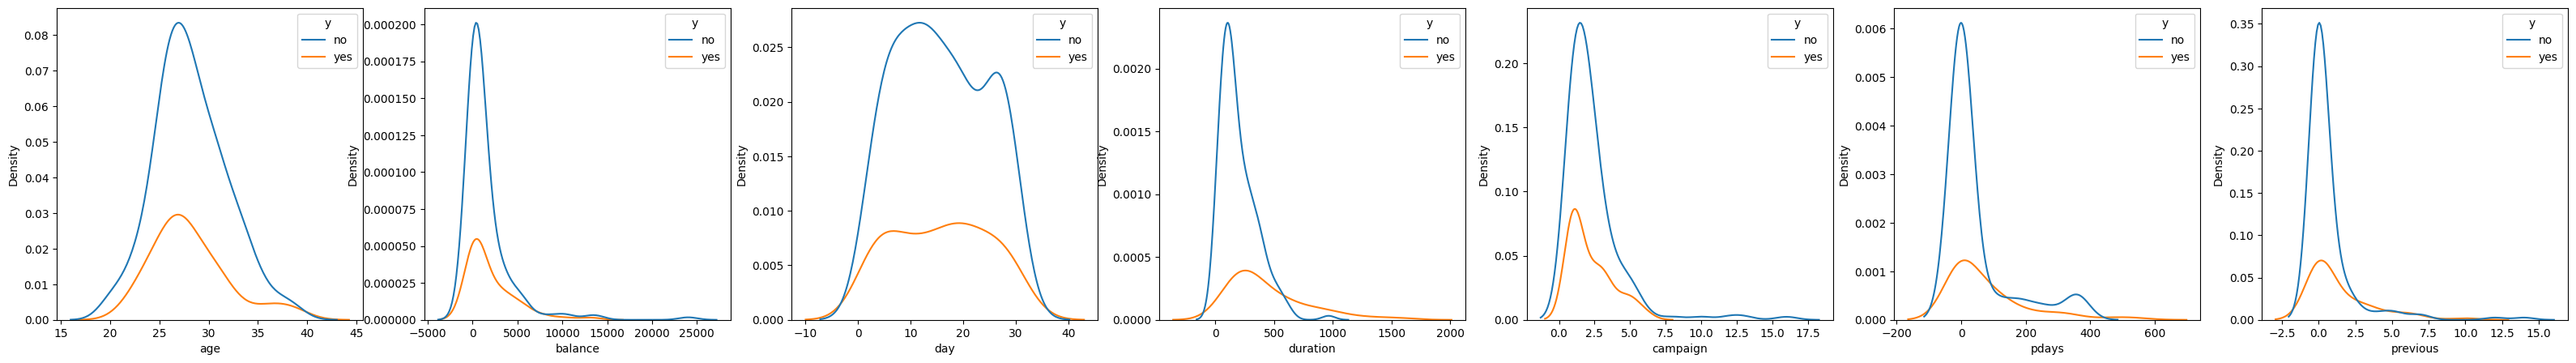

In [32]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student") & (train_df["education"]=="tertiary")],x = col,hue="y")

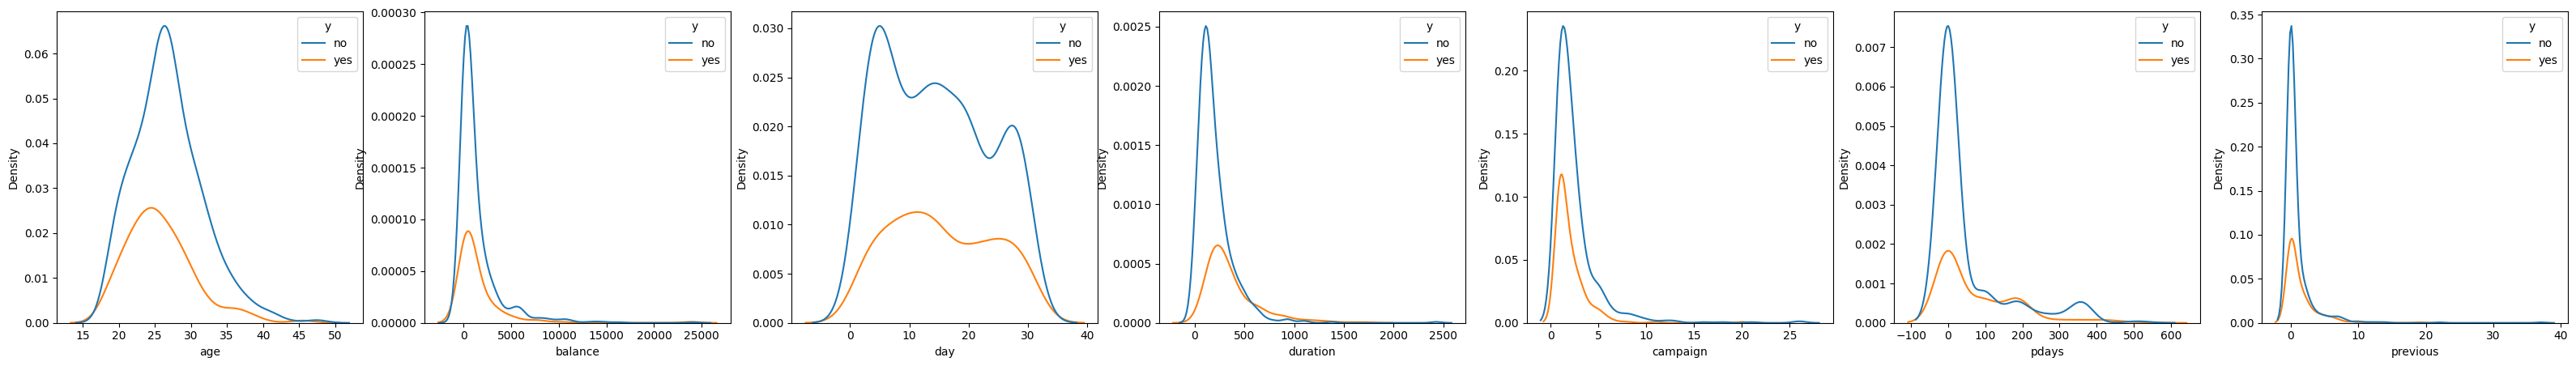

In [33]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student") & (train_df["default"]=="no")],x = col,hue="y")

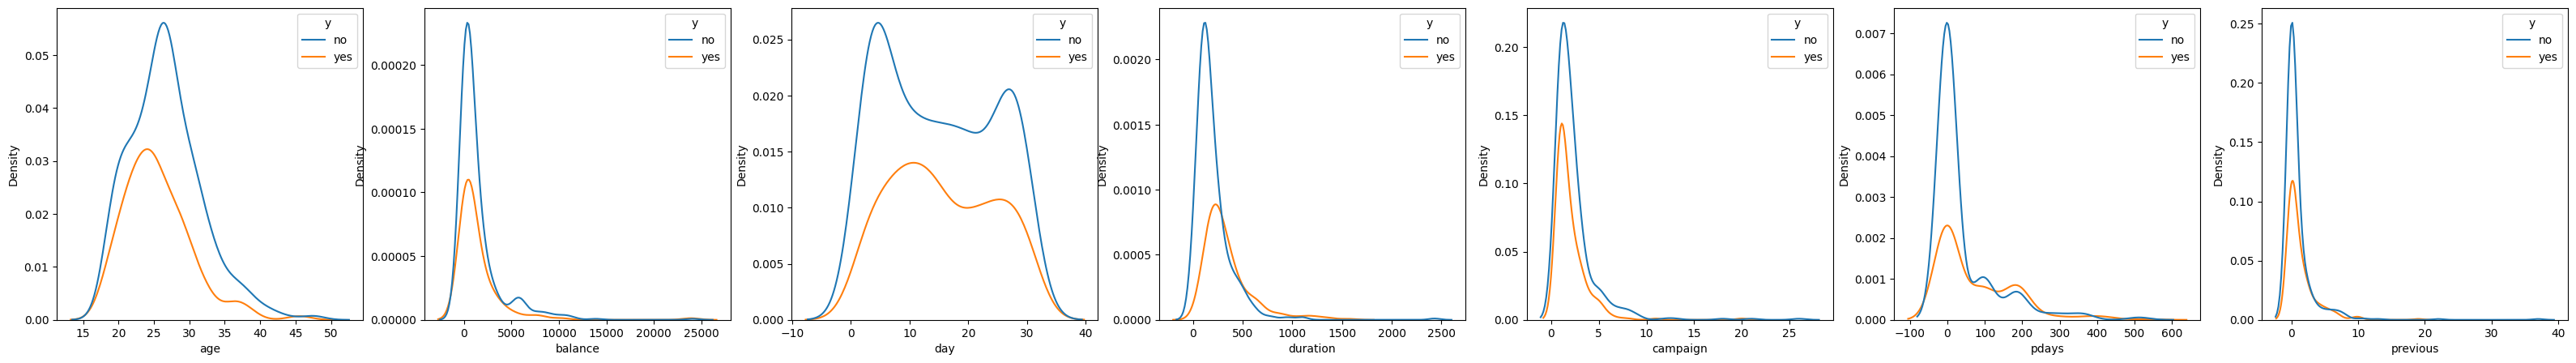

In [34]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student") & (train_df["housing"]=="no")],x = col,hue="y")

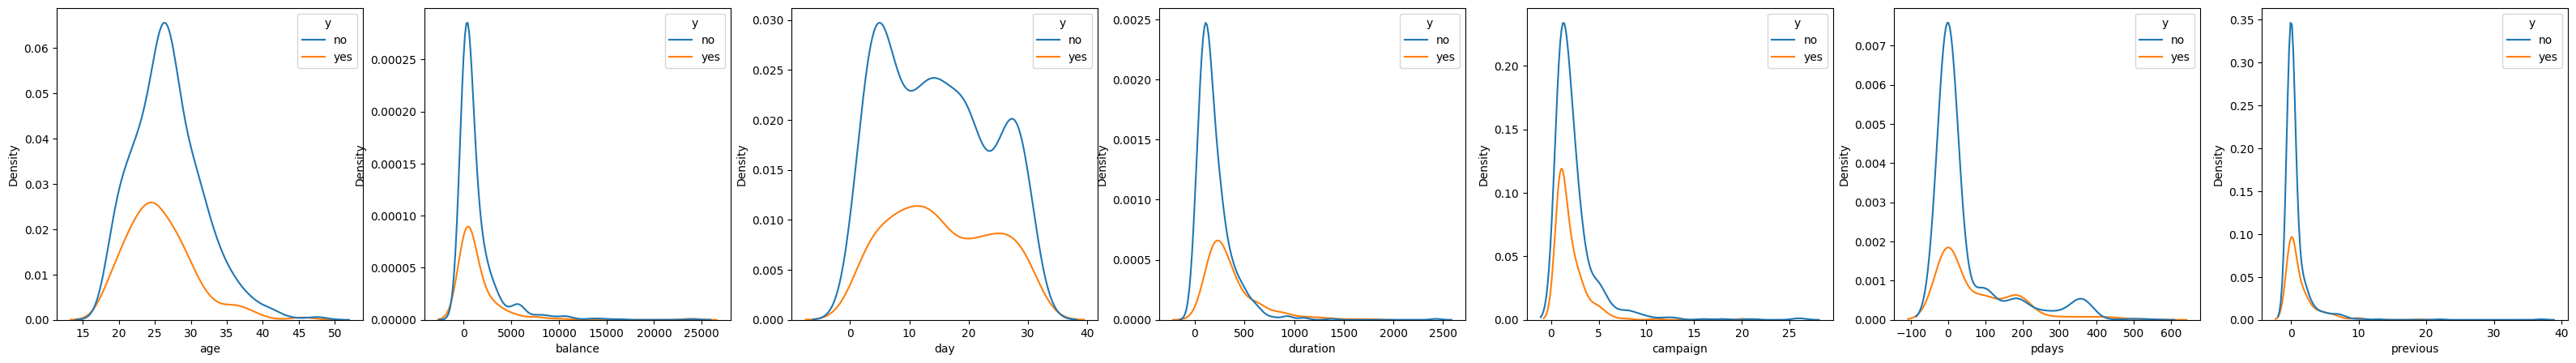

In [35]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student") & (train_df["loan"]=="no")],x = col,hue="y")

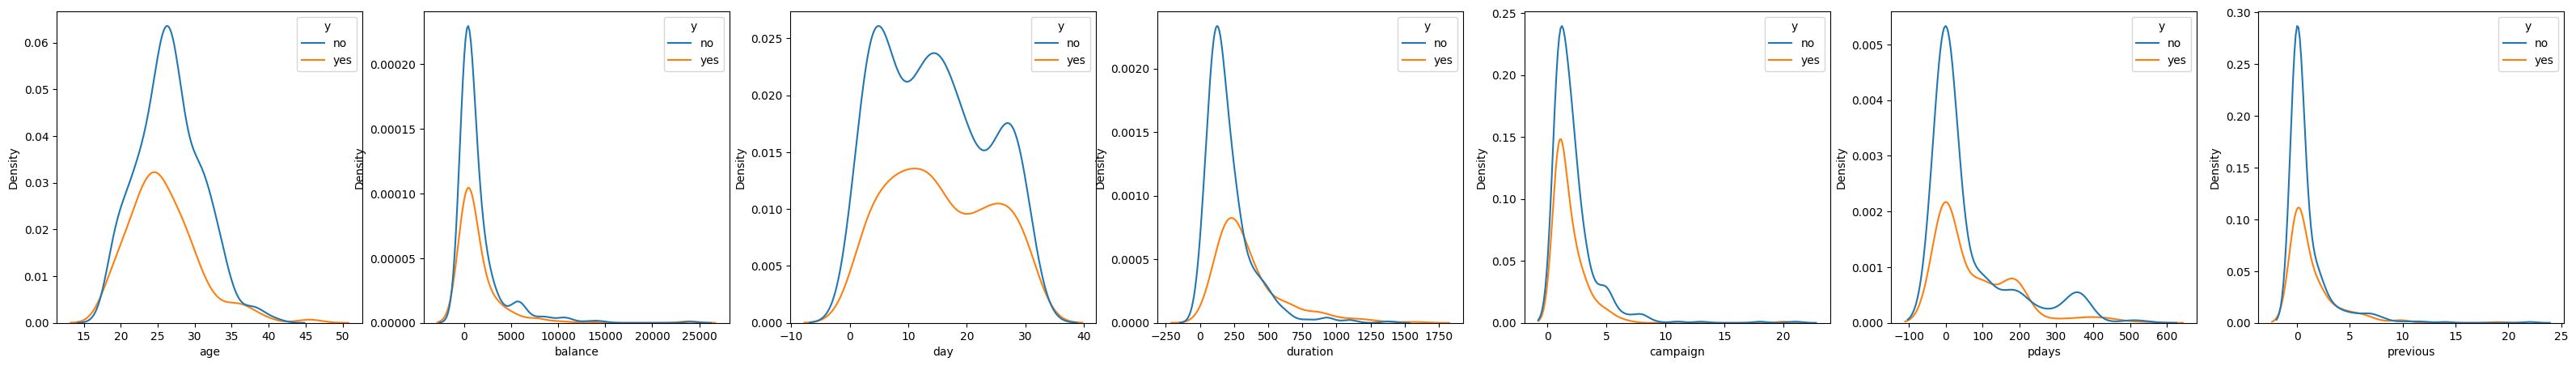

In [37]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student") & (train_df["contact"]=="cellular")],x = col,hue="y")

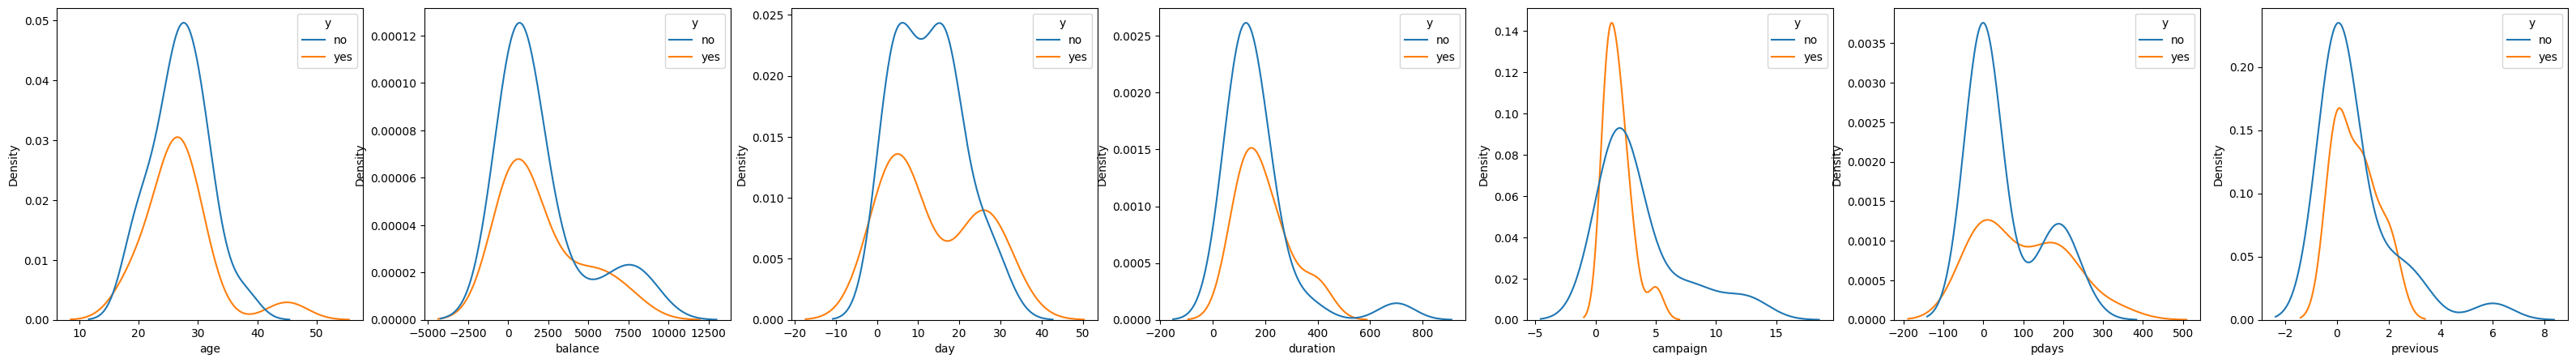

In [38]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student") & (train_df["month"]=="mar")],x = col,hue="y")

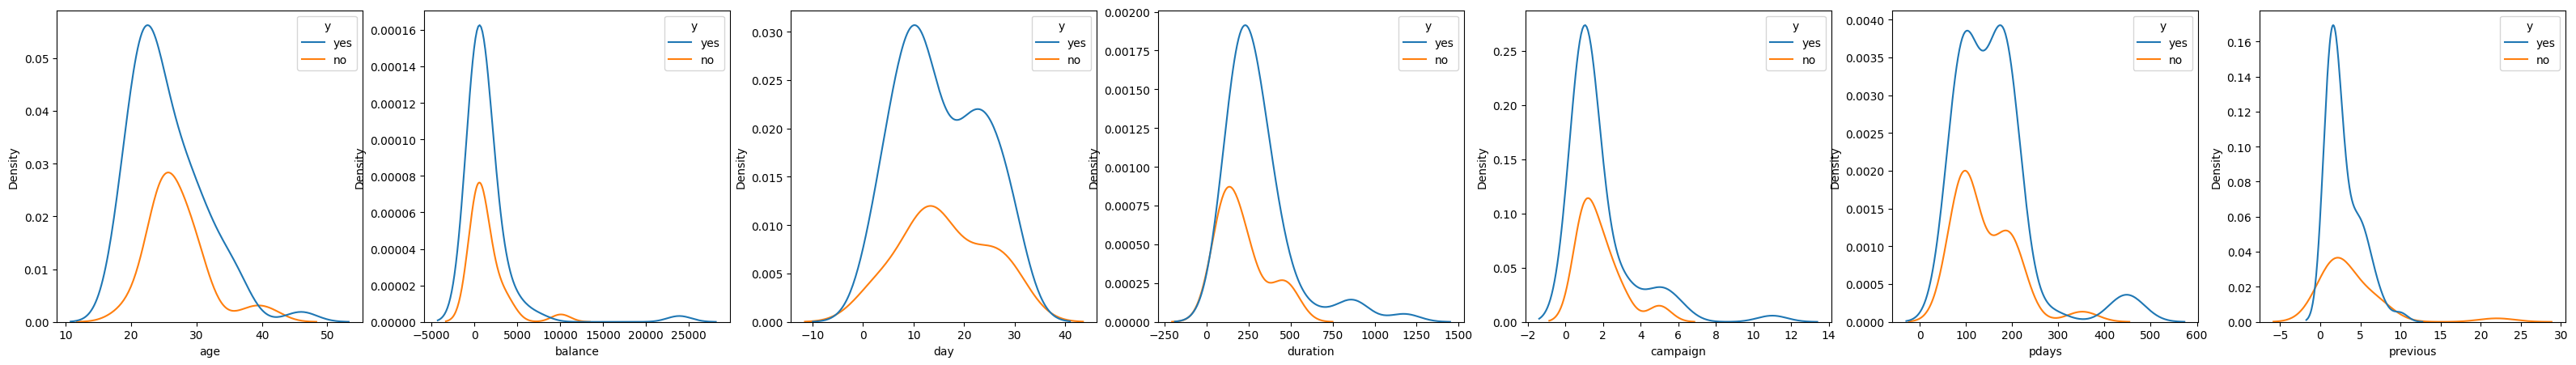

In [39]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student") & (train_df["poutcome"]=="success")],x = col,hue="y")

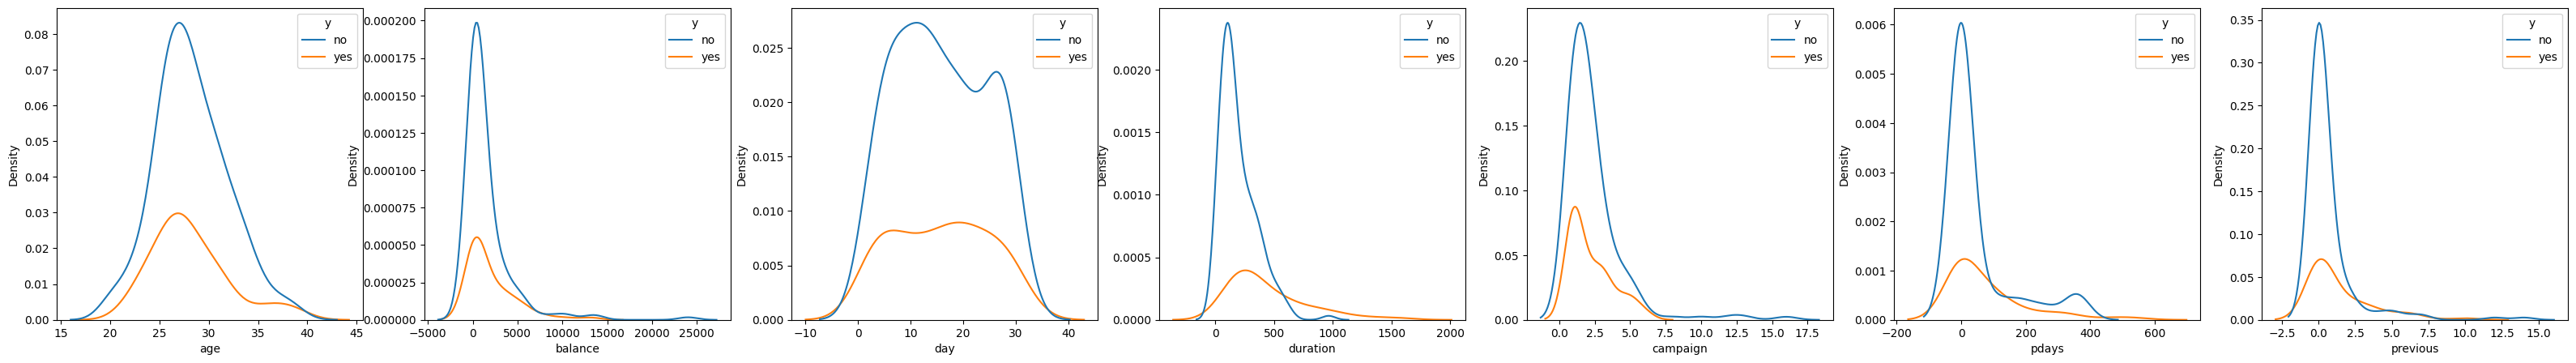

In [41]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student") & (train_df["education"]=="tertiary") & (train_df["default"]=="no") ],x = col,hue="y")

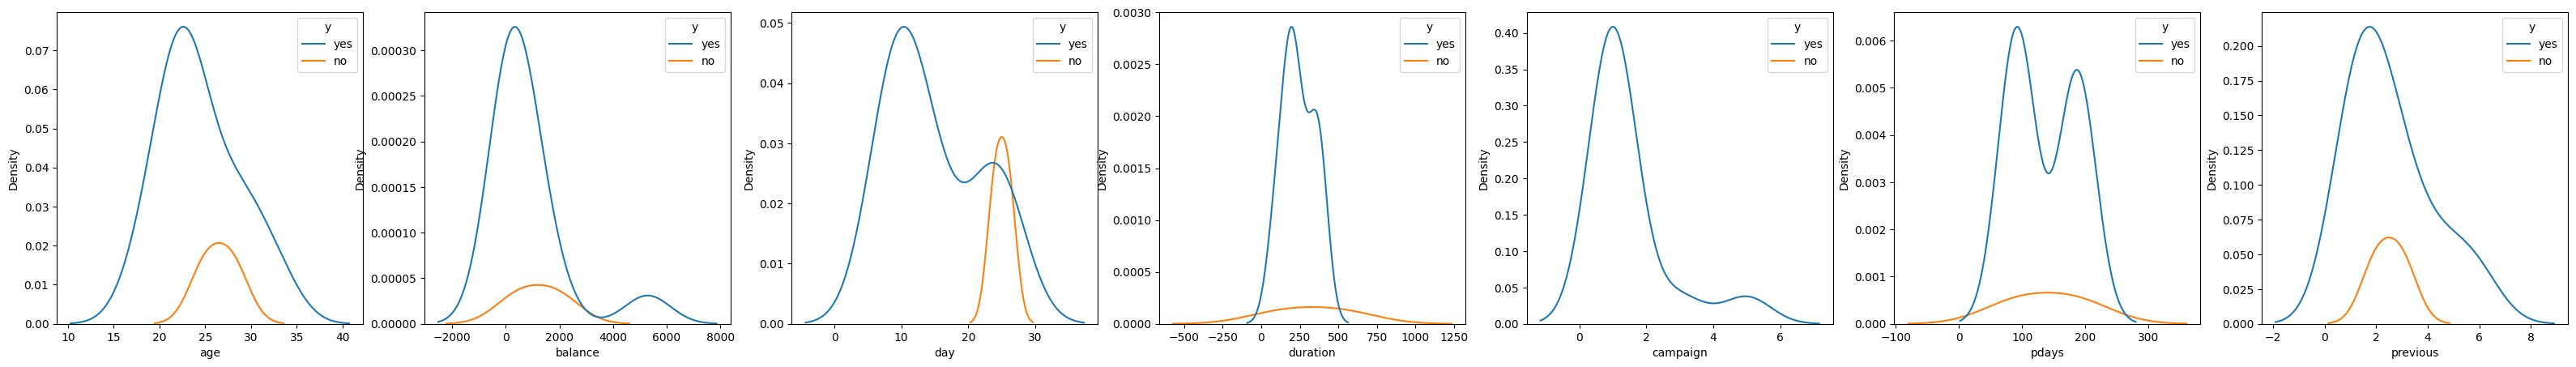

In [104]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student")], x = col,hue="y")

In [ ]:
feb,may,jul,aug,oct

jun,dec(no data)
sep,nov,(intresting)

jan,mar,apr -> strong possibility

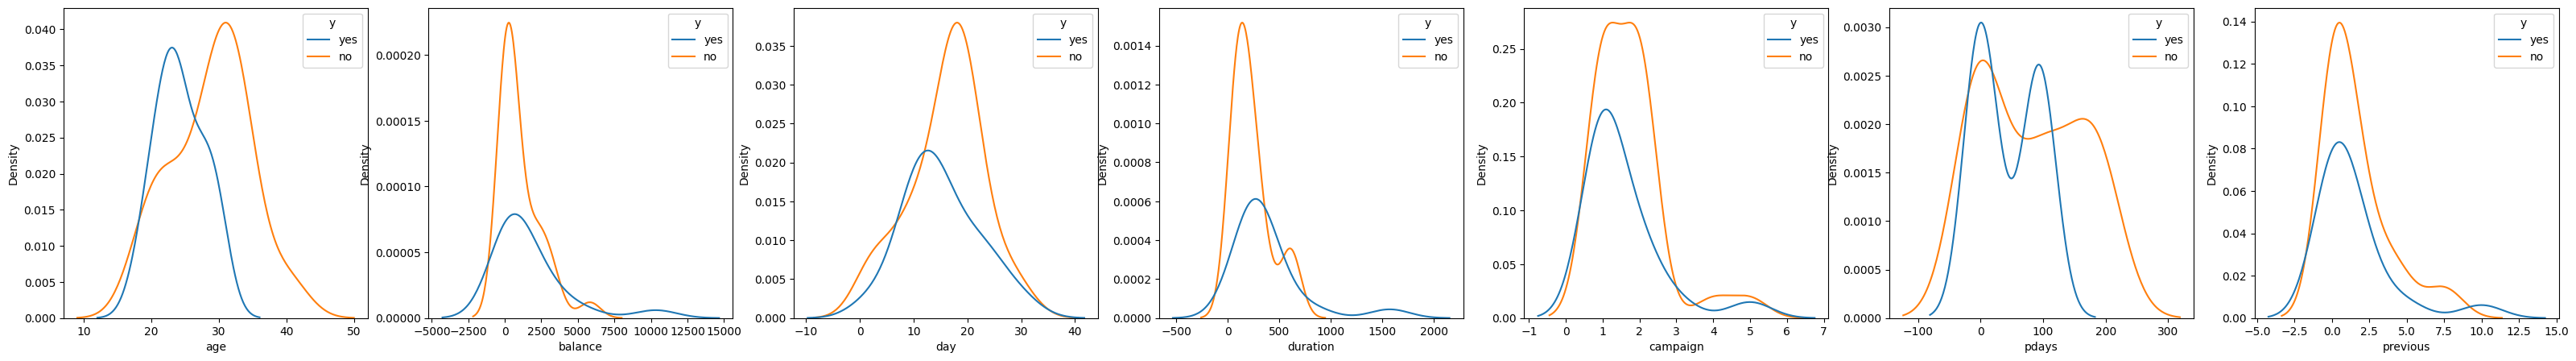

In [68]:
columns = numerical_df.columns
plt.figure(figsize=(40,5))

for idx,col in enumerate(columns):
    plt.subplot(1,7,idx+1)
    sns.kdeplot(data=train_df[(train_df["job"]=="student") & 
                             (train_df["marital"]=="single")&
                             (train_df["month"]=="nov")], x = col,hue="y")

In [ ]:
jul,oct,nov

In [19]:
subscribed_df = train_df[train_df["y"]=="yes"]
subscribed_df.shape

(5289, 17)

In [20]:
not_subscribed_df = train_df[train_df["y"]=="no"]
not_subscribed_df.shape

(39922, 17)

In [21]:
numerical_subscribed_df = subscribed_df.select_dtypes(exclude="object")
categorical_subscribed_df = subscribed_df.select_dtypes(include="object")

In [22]:
numerical_not_subscribed_df = not_subscribed_df.select_dtypes(exclude="object")
categorical_not_subscribed_df = not_subscribed_df.select_dtypes(include="object")

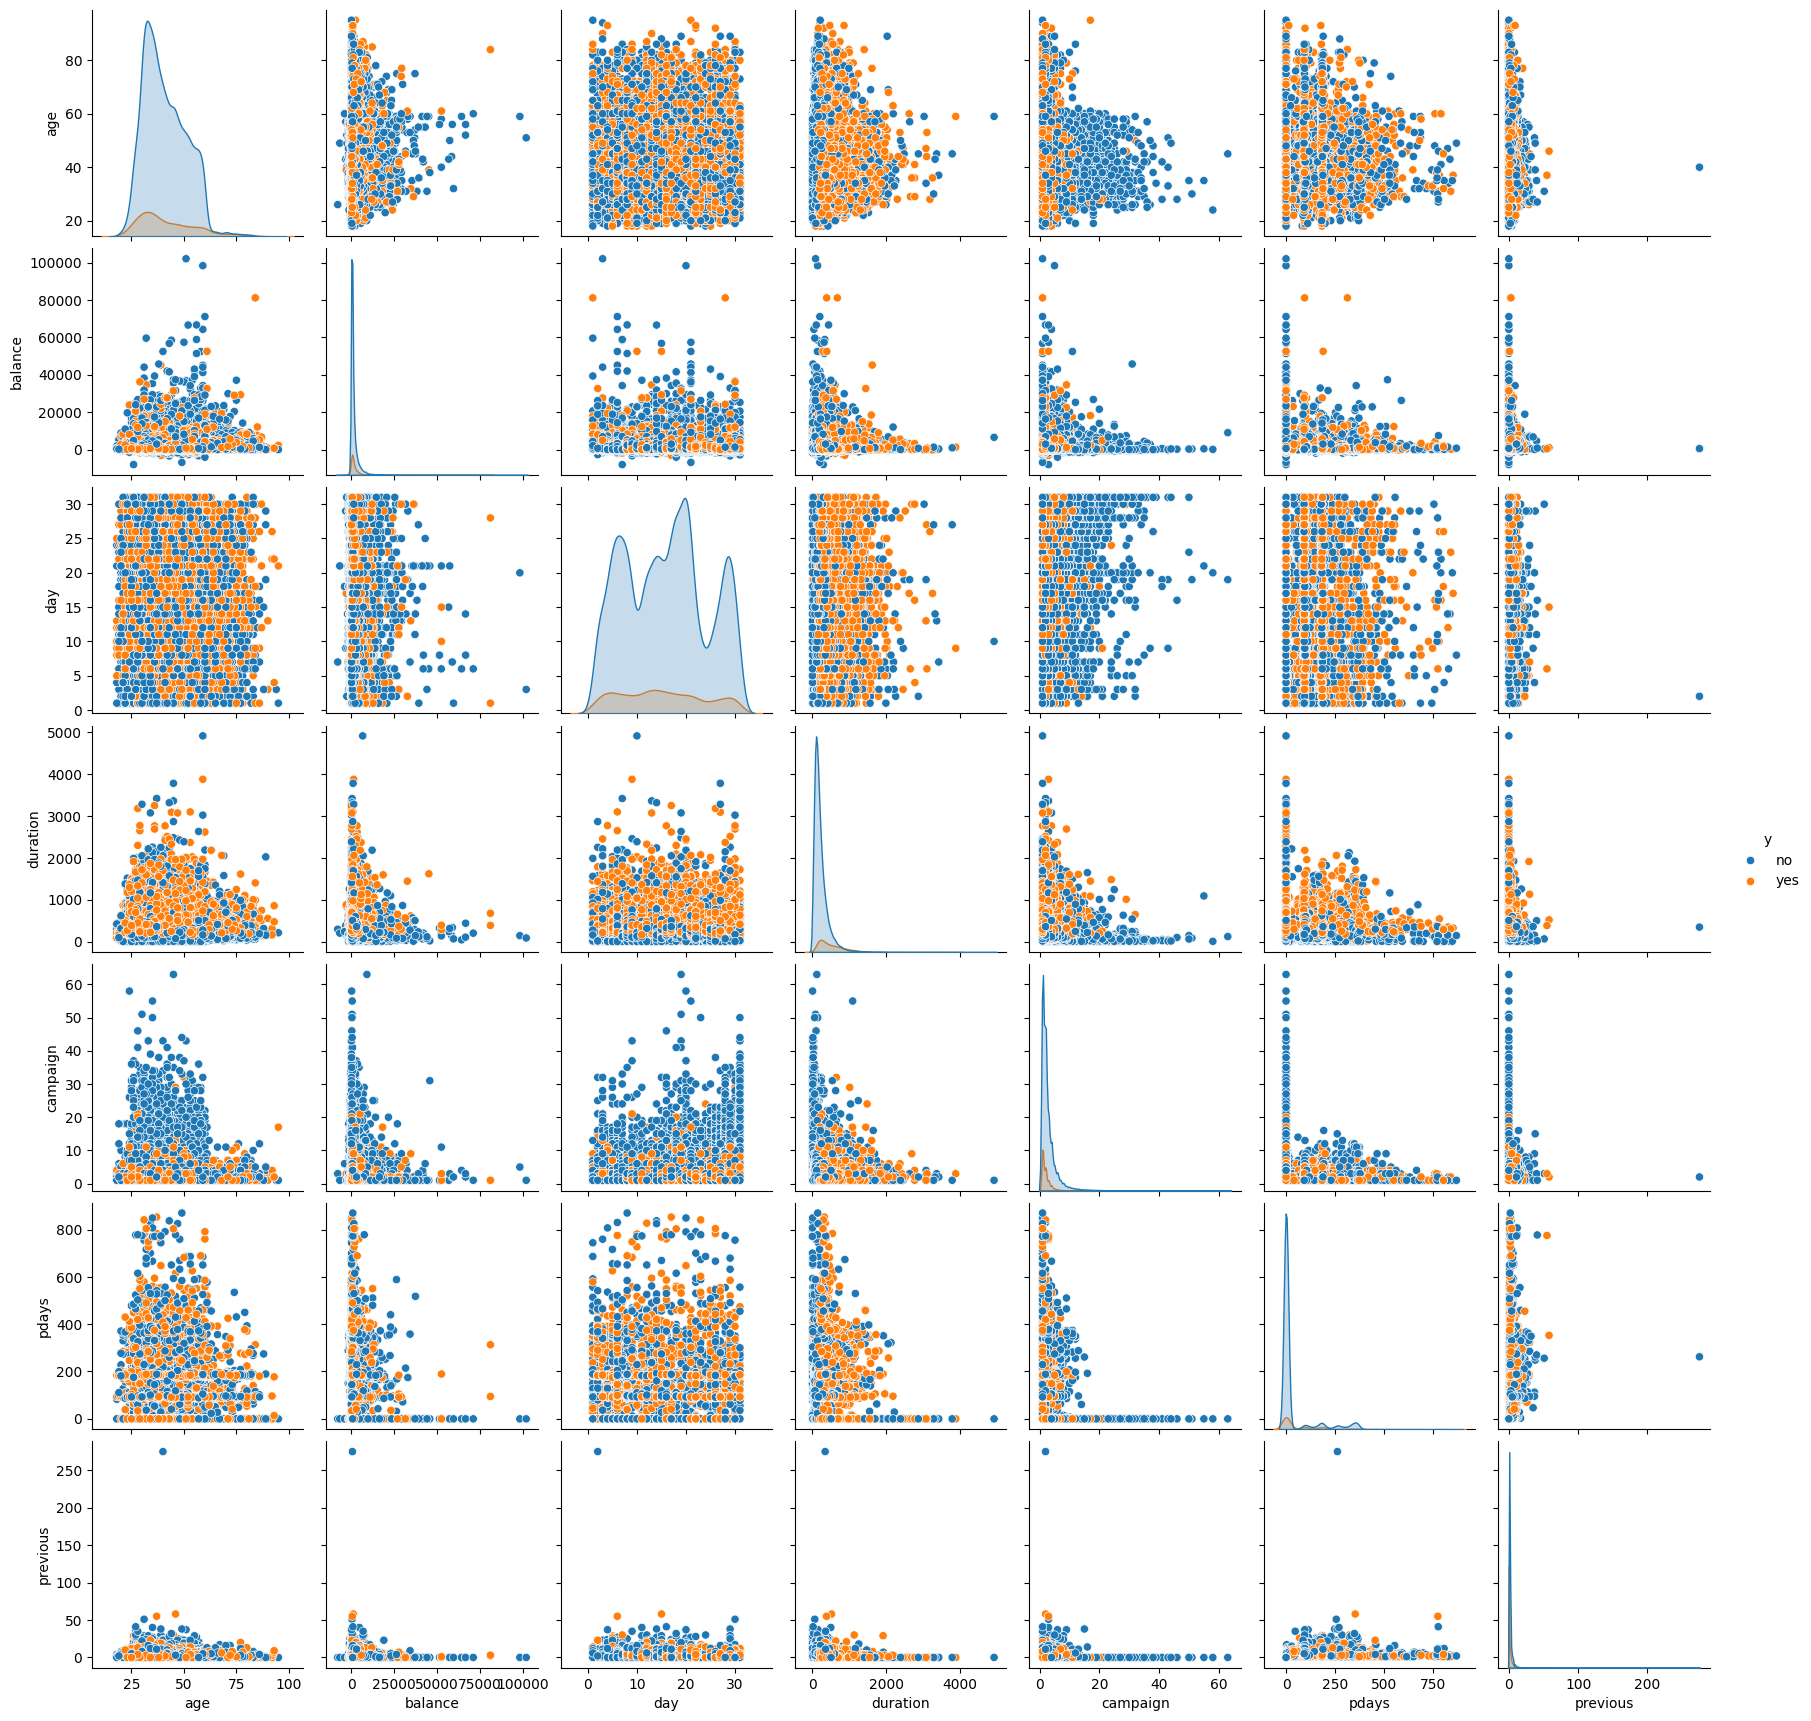

In [30]:
sns.pairplot(train_df,hue="y")

In [ ]:
balance,campaign,duration,